Importar as bases de dados do Excel

Declarar as bibliotecas

In [214]:
import pandas as pd
import datetime
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import bar_chart_race as bcr

warnings.filterwarnings('ignore')

Importar as bases de dados e excluir a coluna Rank

In [215]:
#Importar as bases dados para os modelos
DataframeAuto = pd.read_excel(r"../Data/FinalDataframeAuto.xlsx")
DataframeLeves = pd.read_excel(r"../Data/FinalDataframeLeves.xlsx")

#Excluir a coluna Rank das bases de dados
del DataframeAuto['Rank']
del DataframeLeves['Rank']

Converter a data para Datatype

In [216]:
timefmt = "%d/%m/%Y"
DataframeAuto.Data = pd.to_datetime(DataframeAuto.Data, format=timefmt)
DataframeLeves.Data = pd.to_datetime(DataframeLeves.Data, format=timefmt)

DataframeAuto = pd.DataFrame(DataframeAuto)
DataframeLeves = pd.DataFrame(DataframeLeves)

DataframeAuto['Modelo'] = DataframeAuto['Modelo'].values.astype(str)
DataframeLeves['Modelo'] = DataframeLeves['Modelo'].values.astype(str)

DataframeAuto['Modelo'] = DataframeAuto['Modelo'].str.replace(' ', '')
DataframeLeves['Modelo'] = DataframeLeves['Modelo'].str.replace(' ', '')

DataframeAuto['Modelo'] = DataframeAuto['Modelo'].str.upper()
DataframeLeves['Modelo'] = DataframeLeves['Modelo'].str.upper()


In [217]:
# Set the option to display all rows
# pd.set_option('display.max_rows', None)
# DataframeAuto

In [218]:
# Chamando o dataframe novamente para ver se ocorreu a conversão
DataframeAuto.dtypes

Modelo                object
Quantidade             int64
Data          datetime64[ns]
dtype: object

In [219]:
# Análise básica inicial
# DataframeLeves['Quantidade'].describe()

In [220]:
# Análise básica inicial
DataframeAuto['Quantidade'].describe()

count     8650.000000
mean      3367.787168
std       3584.538967
min        116.000000
25%       1154.250000
50%       2185.000000
75%       4283.750000
max      32629.000000
Name: Quantidade, dtype: float64

Não possui missing values ou valores nulos, com isso não precisamos criar alguma função de data cleaning.

Fazer uma avaliação Estatística dos dados pela a somatória mensal.

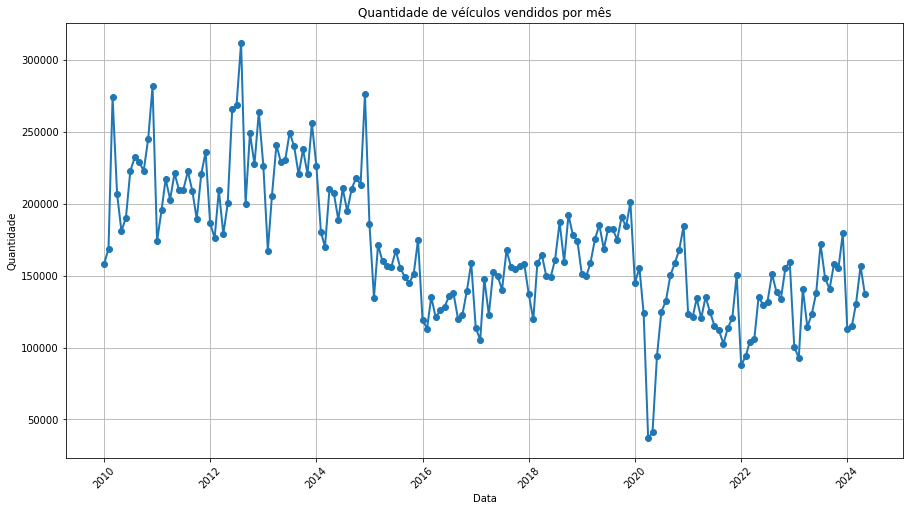

In [221]:
AnaliseAuto = DataframeAuto[['Data', 'Quantidade']]
# AnaliseAuto = pd.DataFrame(AnaliseAuto.set_index('Data').resample('M')['Quantidade'].sum())
AnaliseAuto = AnaliseAuto.groupby(pd.Grouper(freq='MS', key='Data'))['Quantidade'].sum()
plt.figure(figsize=(15, 8)) 
plt.plot(AnaliseAuto, linestyle='-', marker='o', linewidth=2) 
plt.xlabel('Data') 
plt.ylabel('Quantidade')
plt.xticks(rotation = 45) 
plt.title('Quantidade de véículos vendidos por mês') 
plt.grid(True) 

plt.show() 
#AnaliseAuto['Data'], AnaliseAuto['Quantidade']

In [222]:
df = DataframeAuto

In [223]:
# Dados a serem adicionados
novo_dado = [{'Modelo': 'VW/GOL', 'Data': '01/01/2024', 'Quantidade': 0},
             {'Modelo': 'VW/GOL', 'Data': '01/02/2024', 'Quantidade': 0},
             {'Modelo': 'VW/GOL', 'Data': '01/03/2024', 'Quantidade': 0},
             {'Modelo': 'VW/GOL', 'Data': '01/04/2024', 'Quantidade': 0},
             {'Modelo': 'VW/GOL', 'Data': '01/05/2024', 'Quantidade': 0}]

# Criando um dataframe com os novos dados
df_novo = pd.DataFrame(novo_dado)

# Convertendo a coluna 'Data' para o formato datetime
timefmt = "%d/%m/%Y"
df_novo['Data'] = pd.to_datetime(df_novo['Data'], format=timefmt)

df = pd.concat([df, df_novo], ignore_index=True)

In [224]:
# Agrupar por 'Modelo', 'Ano' e 'Data' e calcular a soma da 'Quantidade'
aggregated_data = df.groupby(['Modelo', 'Data'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

In [225]:
# Calcular a soma acumulativa por 'Modelo' e 'Ano'
aggregated_data['Soma Acumulativa'] = aggregated_data.groupby(['Modelo'])['Quantidade'].cumsum()


In [226]:
# Fazer o pivot da tabela para as linhas transformar em coluna
animationPivotTable = aggregated_data.pivot(index='Data', columns='Modelo', values='Soma Acumulativa').fillna(method='ffill')


In [227]:
"""
bcr.bar_chart_race(df=animationPivotTable, 
                   title="Acumulativo dos 10 Veículos mais vendidos de Jan/2010 a Maio/2024", 
                   n_bars=10, 
                   steps_per_period=12, 
                   period_length= 1000,
                   #period_fmt='Ano {x}'
                   orientation='h',
                   sort='desc', 
                   fixed_order=False, 
                   fixed_max=True, 
                   #end_period_pause=0,
                   interpolate_period=False, 
                   period_label={'x': .98, 'y': .3, 'ha': 'right', 'va': 'center'}, 
                   #period_template='%B %d, %Y',
                   #filename='bar_chart_race_modelos.gif' 
                   )
"""

'\nbcr.bar_chart_race(df=animationPivotTable, \n                   title="Acumulativo dos 10 Veículos mais vendidos de Jan/2010 a Maio/2024", \n                   n_bars=10, \n                   steps_per_period=12, \n                   period_length= 1000,\n                   #period_fmt=\'Ano {x}\'\n                   orientation=\'h\',\n                   sort=\'desc\', \n                   fixed_order=False, \n                   fixed_max=True, \n                   #end_period_pause=0,\n                   interpolate_period=False, \n                   period_label={\'x\': .98, \'y\': .3, \'ha\': \'right\', \'va\': \'center\'}, \n                   #period_template=\'%B %d, %Y\',\n                   #filename=\'bar_chart_race_modelos.gif\' \n                   )\n'

In [228]:
# Criar um dataframe com os dados por montadora
aggregated_data_montadora = aggregated_data[['Modelo', 'Data', 'Quantidade']]

# Pegar as informações antes da /
aggregated_data_montadora['Modelo'] = aggregated_data_montadora['Modelo'].apply(lambda x: x.split('/')[0])

In [229]:
# Agrupar por 'Modelo', 'Ano' e 'Data' e calcular a soma da 'Quantidade'
aggregated_data_montadora = aggregated_data_montadora.groupby(['Modelo', 'Data'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

# Calcular a soma acumulativa por 'Modelo' e 'Ano'
aggregated_data_montadora['Soma Acumulativa'] = aggregated_data_montadora.groupby(['Modelo'])['Quantidade'].cumsum()

# Pivotar a tabela para ver linhas como colunas
animationPivotTable_montadora = aggregated_data_montadora.pivot(index='Data', columns='Modelo', values='Soma Acumulativa').fillna(method='ffill')

In [230]:
#pip install git+https://github.com/andresberejnoi/bar_chart_race.git@image_labels

In [231]:
"""
bcr.bar_chart_race(df=animationPivotTable_montadora, title="As 10 montadoras (auto) que mais venderam de Jan/10 a Maio/24", 
                   #img_label_folder='imagens',
                   n_bars=10, 
                   steps_per_period=1, 
                   period_length= 100,
                   #period_fmt='Ano {x}',
                   #tick_image_mode='trailing',
                   fixed_max=True,
                   title_size='smaller',
                   #perpendicular_bar_func='mean'
                   #filename='bar_chart_race_montadoras.gif'
                   )
"""

'\nbcr.bar_chart_race(df=animationPivotTable_montadora, title="As 10 montadoras (auto) que mais venderam de Jan/10 a Maio/24", \n                   #img_label_folder=\'imagens\',\n                   n_bars=10, \n                   steps_per_period=1, \n                   period_length= 100,\n                   #period_fmt=\'Ano {x}\',\n                   #tick_image_mode=\'trailing\',\n                   fixed_max=True,\n                   title_size=\'smaller\',\n                   #perpendicular_bar_func=\'mean\'\n                   #filename=\'bar_chart_race_montadoras.gif\'\n                   )\n'

Montar um gráfico da variação de vendas dos 10 principais modelos de veículos vendidos

In [232]:
# Soma acumulada por modelo de veículo
listModelos = []
listModelos = aggregated_data[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(10)['Modelo'].tolist()

In [233]:
# Soma acumulada por montadora
listMontadoras = []
listMontadoras = aggregated_data_montadora[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(10)['Modelo'].tolist()

In [234]:
# O gráfico que fiz sozinho para mostrar as 10 montadoras que mais venderam
"""
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

for model in listModelos:
    AnaliseAuto = aggregated_data[['Data', 'Quantidade', 'Modelo']]
    AnaliseAuto = aggregated_data[aggregated_data['Modelo'] == model][['Data', 'Quantidade']]
    # Set 'Data' as the index
    AnaliseAuto.set_index('Data', inplace=True)

    plt.figure(figsize=(6, 3)) 
    plt.plot(AnaliseAuto, linestyle = 'dotted') 
    plt.xlabel('Data') 
    plt.ylabel('Quantidade')
    plt.xticks(rotation = 45) 
    plt.title(f'{model}') 
    plt.grid(True)

    # Set y-axis formatter to thousands
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    plt.show() 
"""

"\ndef thousands_formatter(x, pos):\n    return f'{x*1e-3:,.0f}K'\n\nfor model in listModelos:\n    AnaliseAuto = aggregated_data[['Data', 'Quantidade', 'Modelo']]\n    AnaliseAuto = aggregated_data[aggregated_data['Modelo'] == model][['Data', 'Quantidade']]\n    # Set 'Data' as the index\n    AnaliseAuto.set_index('Data', inplace=True)\n\n    plt.figure(figsize=(6, 3)) \n    plt.plot(AnaliseAuto, linestyle = 'dotted') \n    plt.xlabel('Data') \n    plt.ylabel('Quantidade')\n    plt.xticks(rotation = 45) \n    plt.title(f'{model}') \n    plt.grid(True)\n\n    # Set y-axis formatter to thousands\n    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))\n\n    plt.show() \n"

Fazer um gráfico com as vendas por montadora/modelo por mês das 10 principais

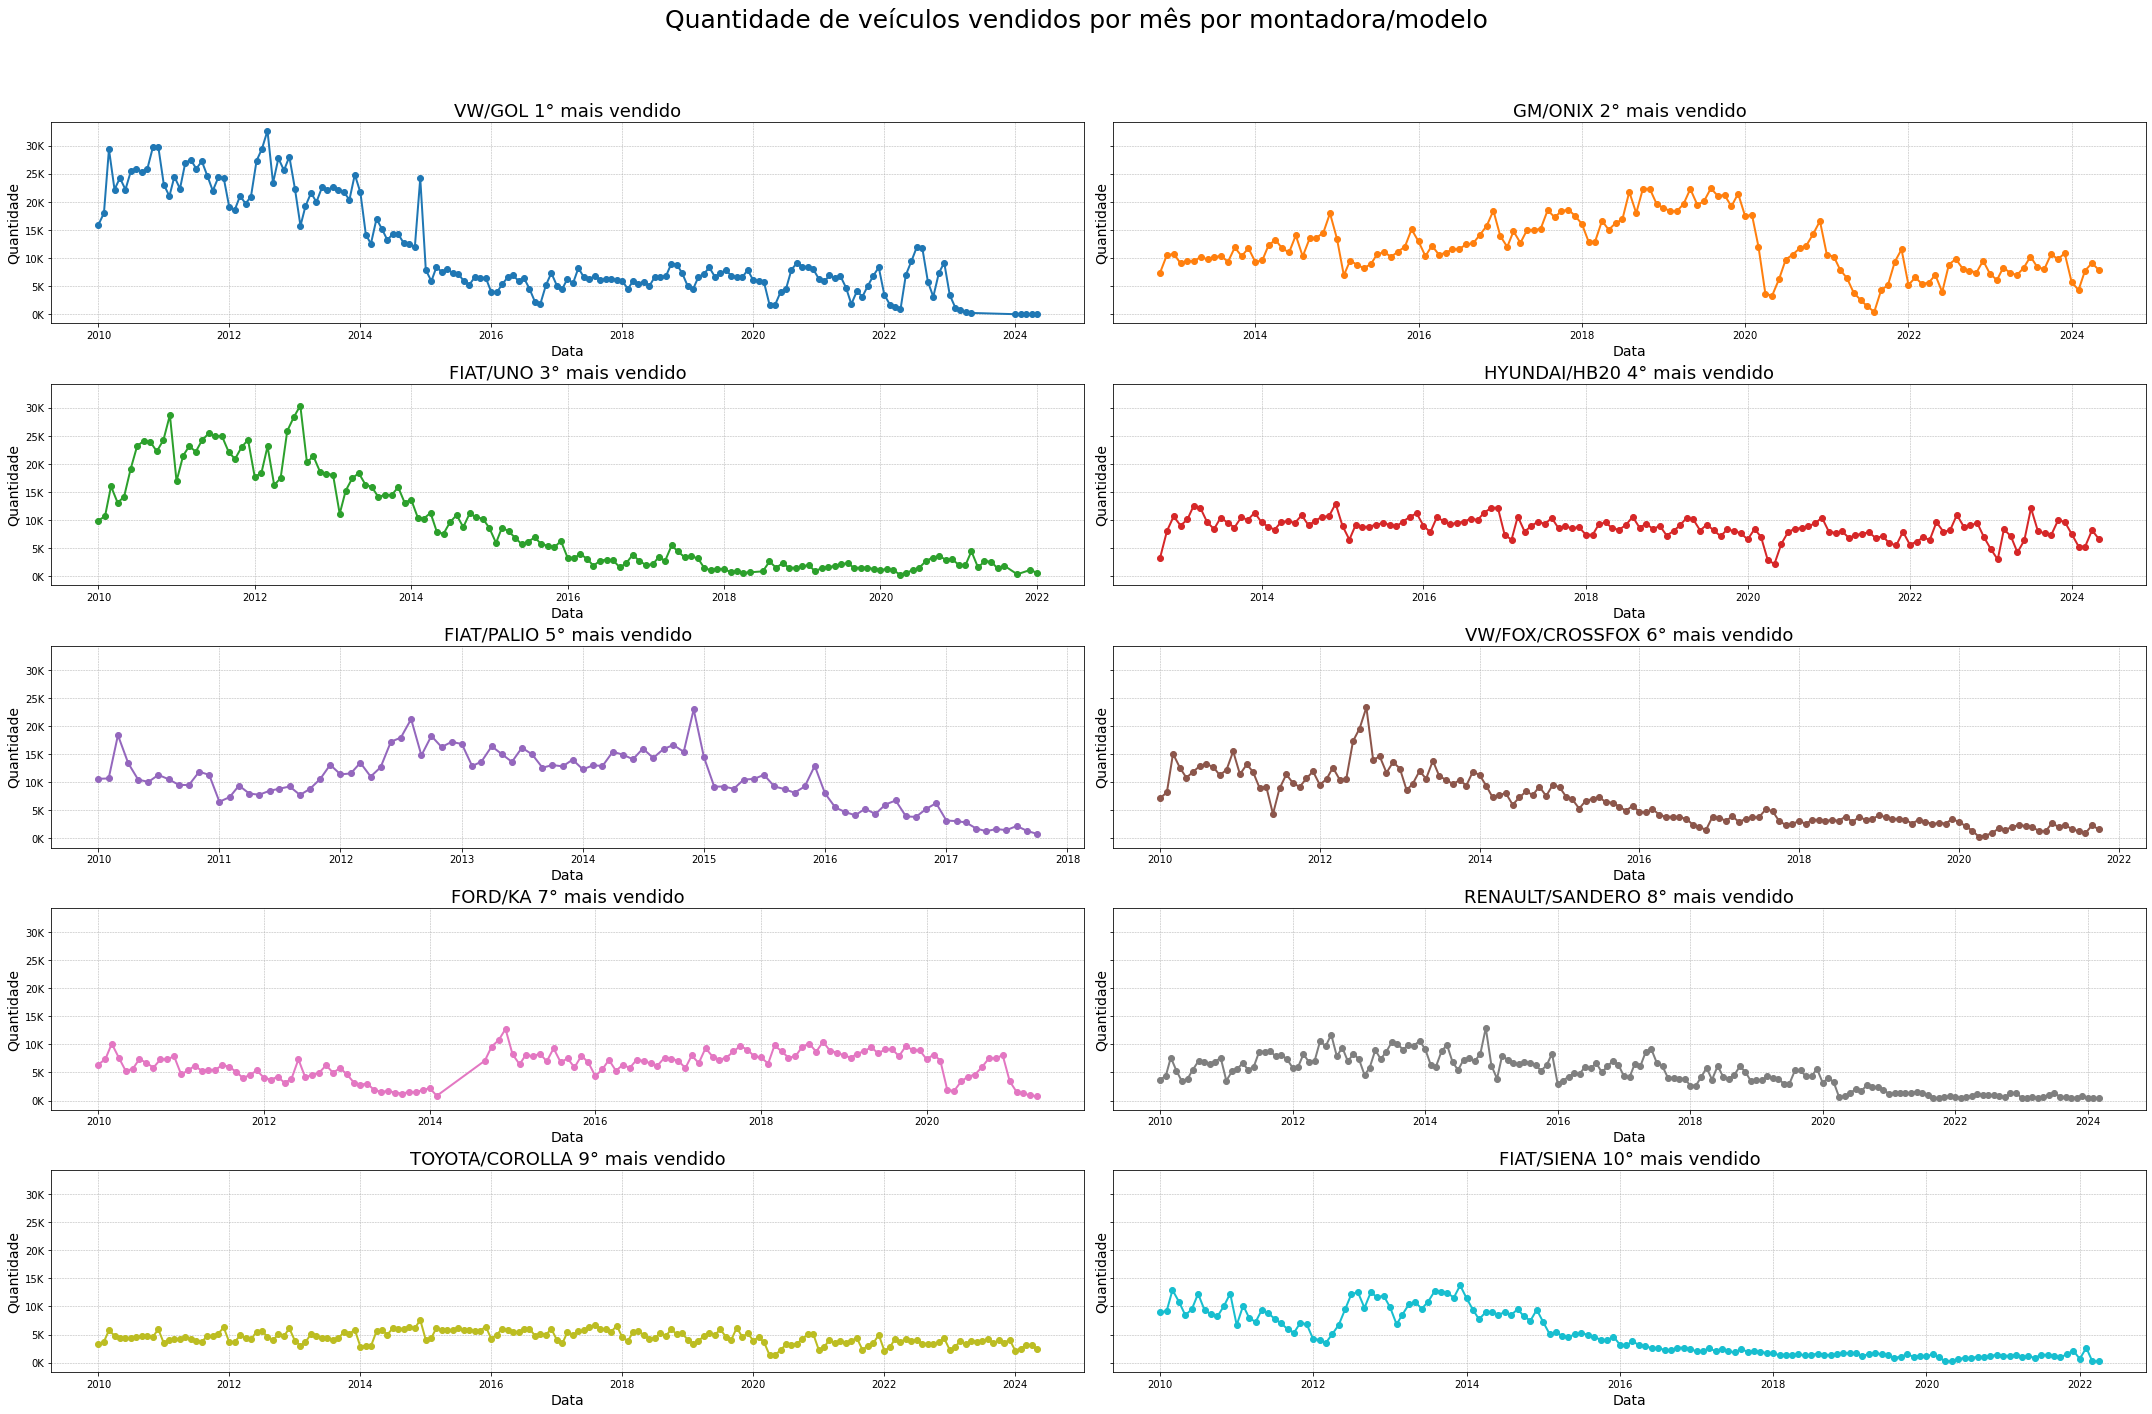

In [235]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# Convert 'Data' column to datetime format
aggregated_data['Data'] = pd.to_datetime(aggregated_data['Data'], errors='coerce')
# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0
# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listModelos):
    i = i+1

    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAuto = aggregated_data[aggregated_data['Modelo'] == model][['Data', 'Quantidade']]

    # Set 'Data' as the index
    AnaliseAuto.set_index('Data', inplace=True)

    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAuto, linestyle='-', marker='o', color=sns.color_palette('tab10')[listModelos.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora/modelo', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()



Fazer um gráfico das 10 montadoras que mais venderam

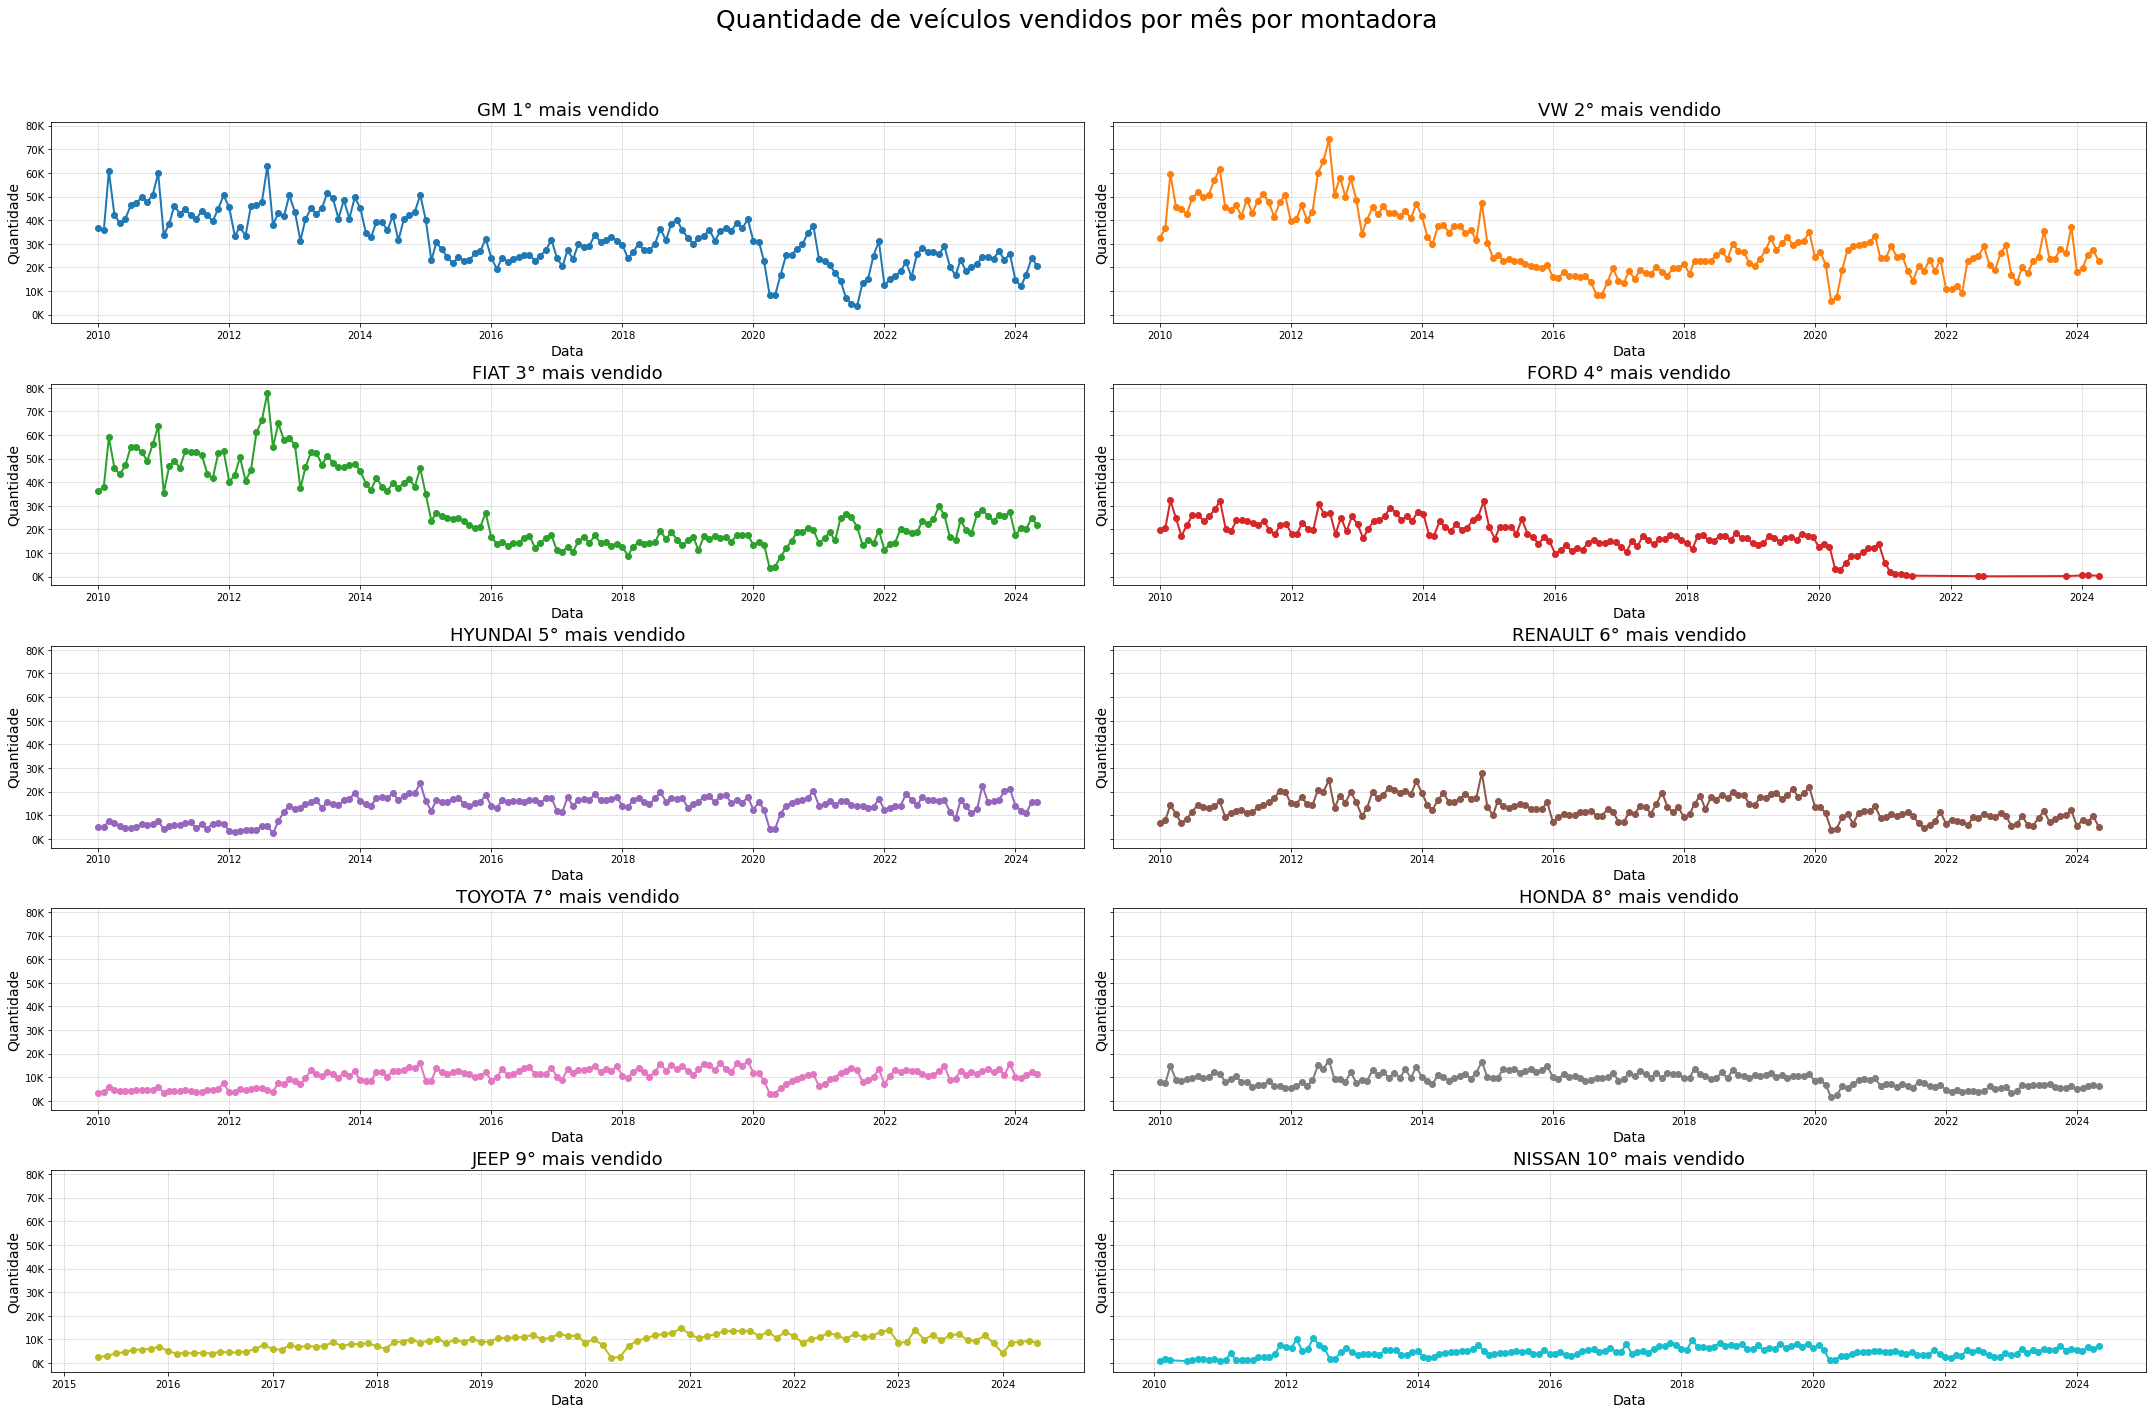

In [236]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# Assuming aggregated_data is your DataFrame
# Convert 'Data' column to datetime format
aggregated_data_montadora['Data'] = pd.to_datetime(aggregated_data_montadora['Data'], errors='coerce', )

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0
# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listMontadoras):
    i = i+1
    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAuto = aggregated_data_montadora[aggregated_data_montadora['Modelo'] == model][['Data', 'Quantidade']]
    
    # Set 'Data' as the index
    AnaliseAuto.set_index('Data', inplace=True)
    
    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAuto, linestyle='-', marker='o', color=sns.color_palette('tab10')[listMontadoras.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

Quantidade média de véículos vendidos por mês de 2010 a 2023(exclusão de 2020)

In [237]:
# Filtrar os dados de 2010 a 2023 e remove o ano 2020
aggregated_data_month = aggregated_data[['Data', 'Quantidade', 'Modelo', 'Soma Acumulativa']].query('Data < "2020-01-01" or Data > "2020-12-01" and Data < "2024-01-01"')
aggregated_data_month['Data'] = aggregated_data_month['Data'].dt.month

AnaliseAuto = aggregated_data_month.groupby(['Data', 'Modelo'])['Quantidade'].mean().reset_index().sort_values('Data', ascending=True)

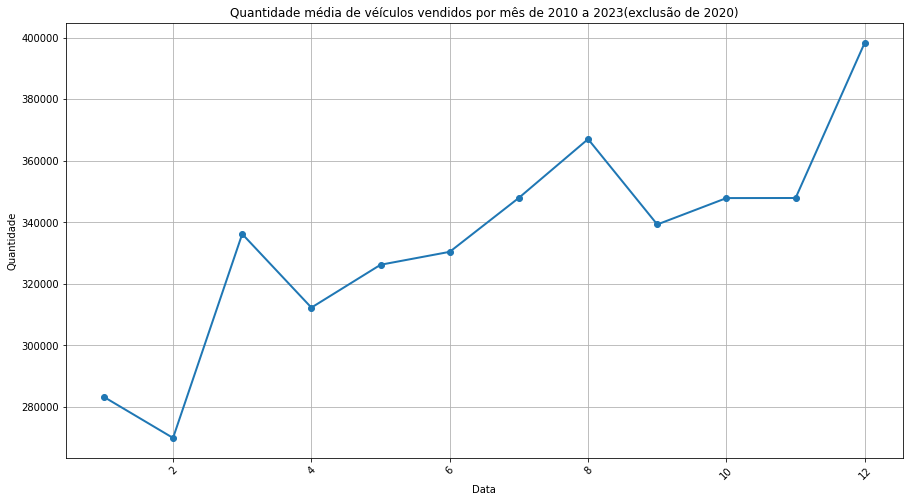

In [238]:
AnaliseAutoMonth = AnaliseAuto.groupby(pd.Grouper(key='Data'))['Quantidade'].sum()
# AnaliseAuto = AnaliseAuto.groupby(pd.Grouper(freq='MS', key='Data'))['Quantidade'].sum()
plt.figure(figsize=(15, 8)) 
plt.plot(AnaliseAutoMonth, linestyle='-', marker='o', linewidth=2) 
plt.xlabel('Data') 
plt.ylabel('Quantidade')
plt.xticks(rotation = 45) 
plt.title('Quantidade média de véículos vendidos por mês de 2010 a 2023(exclusão de 2020)') 
plt.grid(True) 

plt.show() 

Quantidade de veículos vendidos por mês por montadora/modelo de 2010 a 2023(exclusão de 2020)

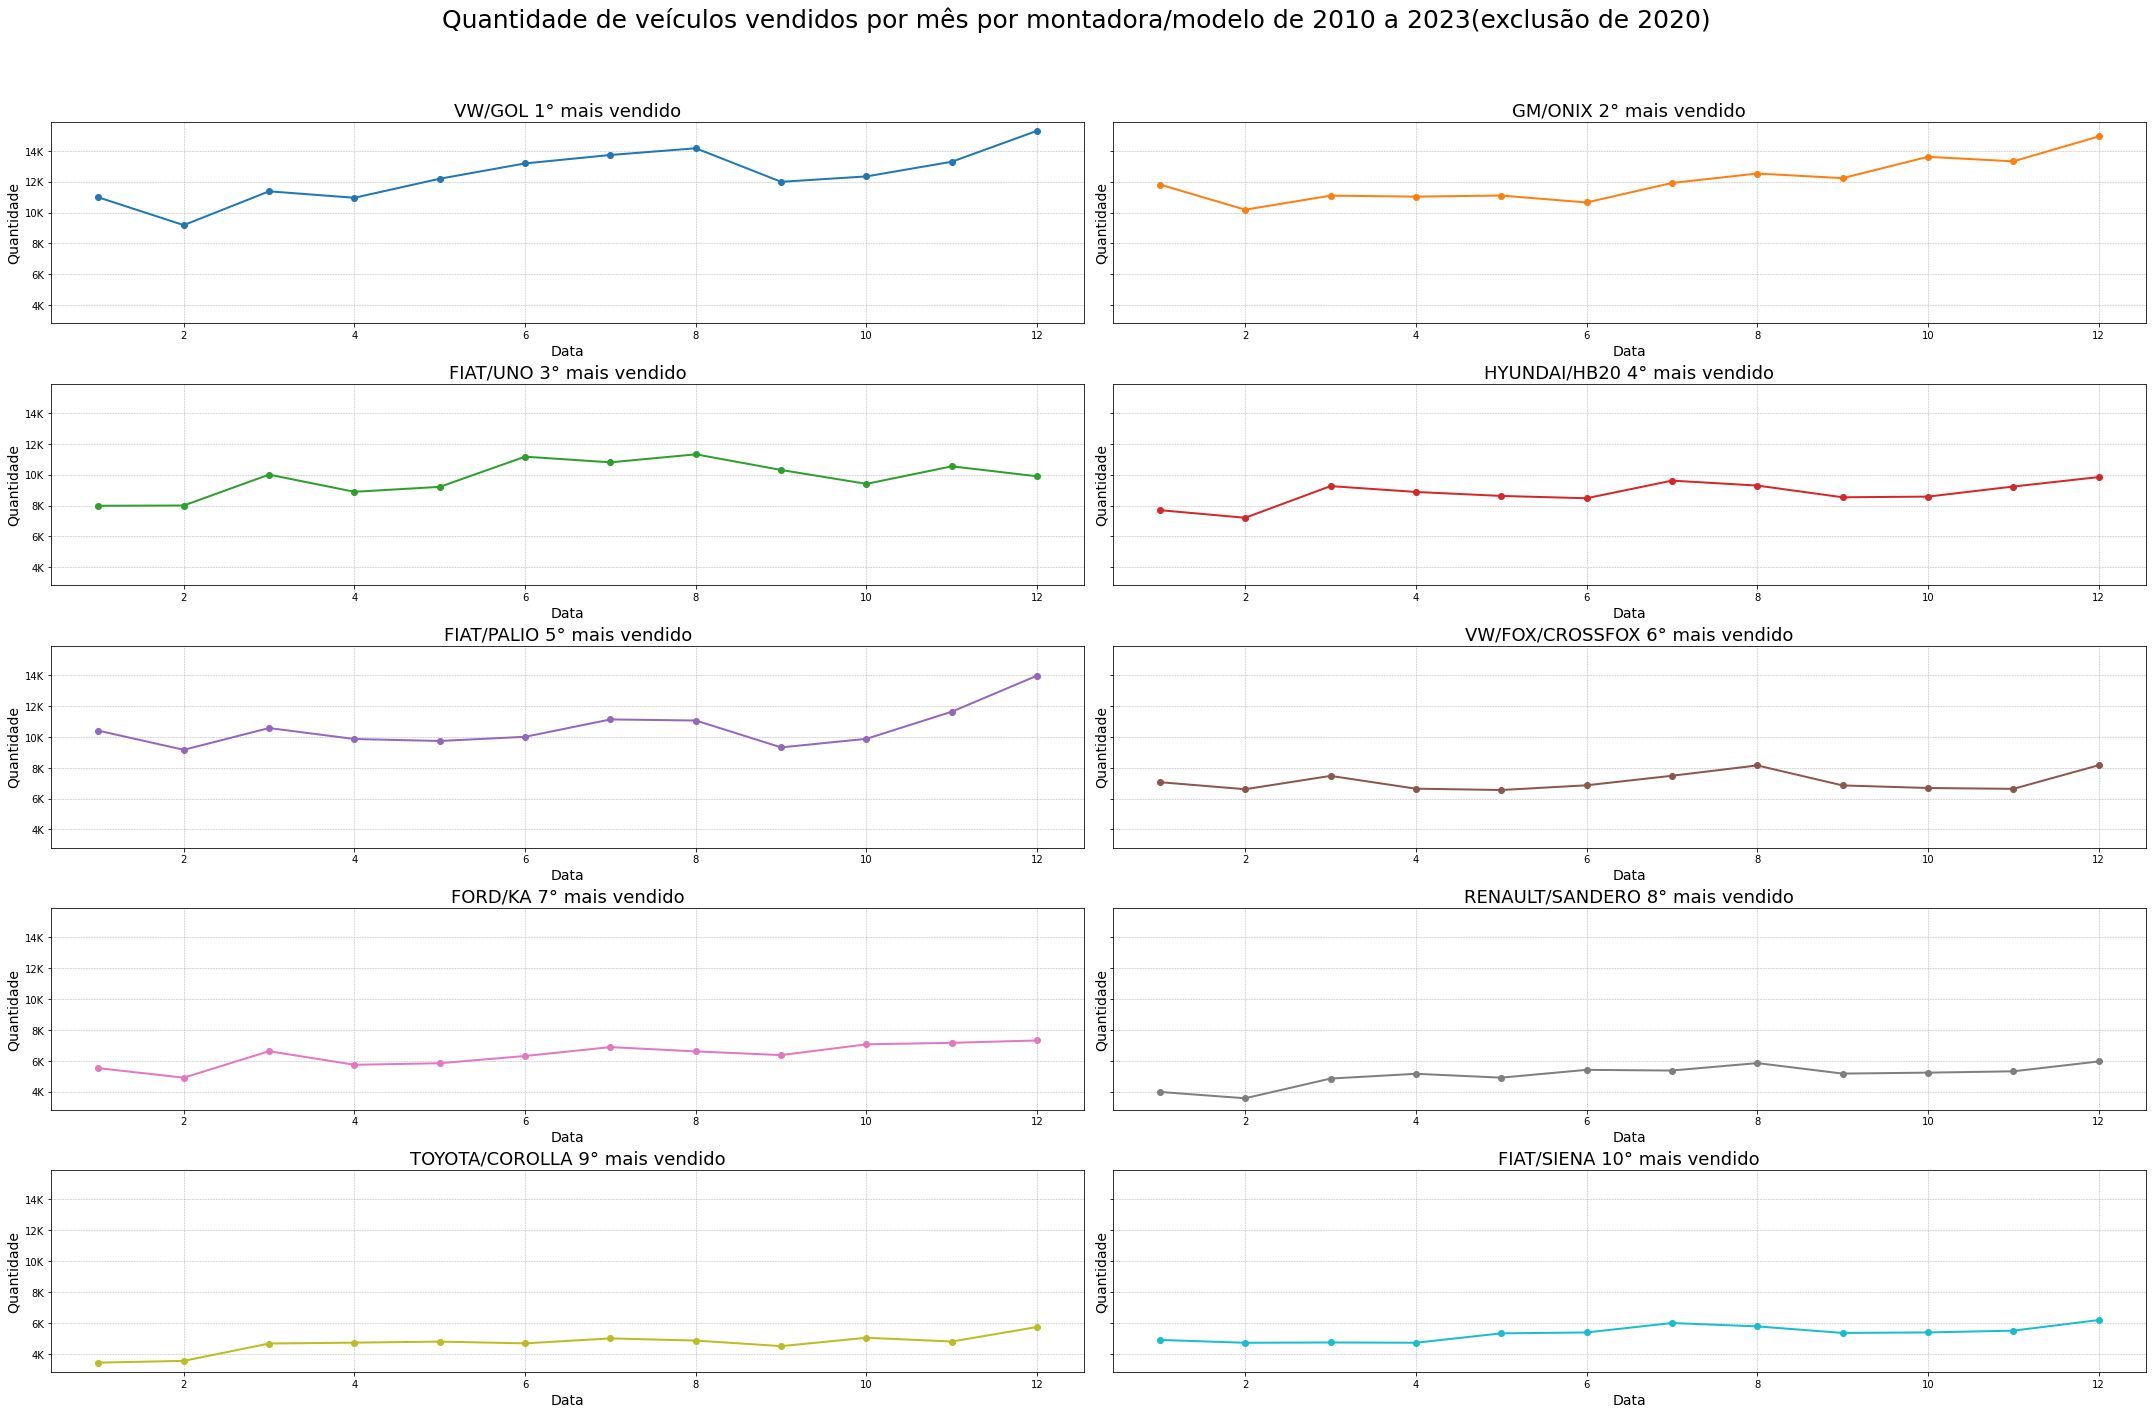

In [239]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0
# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listModelos):
    i = i+1

    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAutoMonth = AnaliseAuto[AnaliseAuto['Modelo'] == model][['Data', 'Quantidade']]
    # Set 'Data' as the index
    AnaliseAutoMonth.set_index('Data', inplace=True)

    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAutoMonth, linestyle='-', marker='o', color=sns.color_palette('tab10')[listModelos.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora/modelo de 2010 a 2023(exclusão de 2020)', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

Quantidade de veículos vendidos por mês por montadora de 2010 a 2023(exclusão de 2020)

In [240]:
# Filtrar os dados de 2010 a 2023 menos 2020
aggregated_data_montadora_month = aggregated_data_montadora[['Data', 'Quantidade', 'Modelo', 'Soma Acumulativa']].query('Data < "2020-01-01" or Data > "2020-12-01" and Data < "2024-01-01"')
aggregated_data_montadora_month['Data'] = aggregated_data_montadora_month['Data'].dt.month

AnaliseAutoMontadora = aggregated_data_montadora_month.groupby(['Data', 'Modelo'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

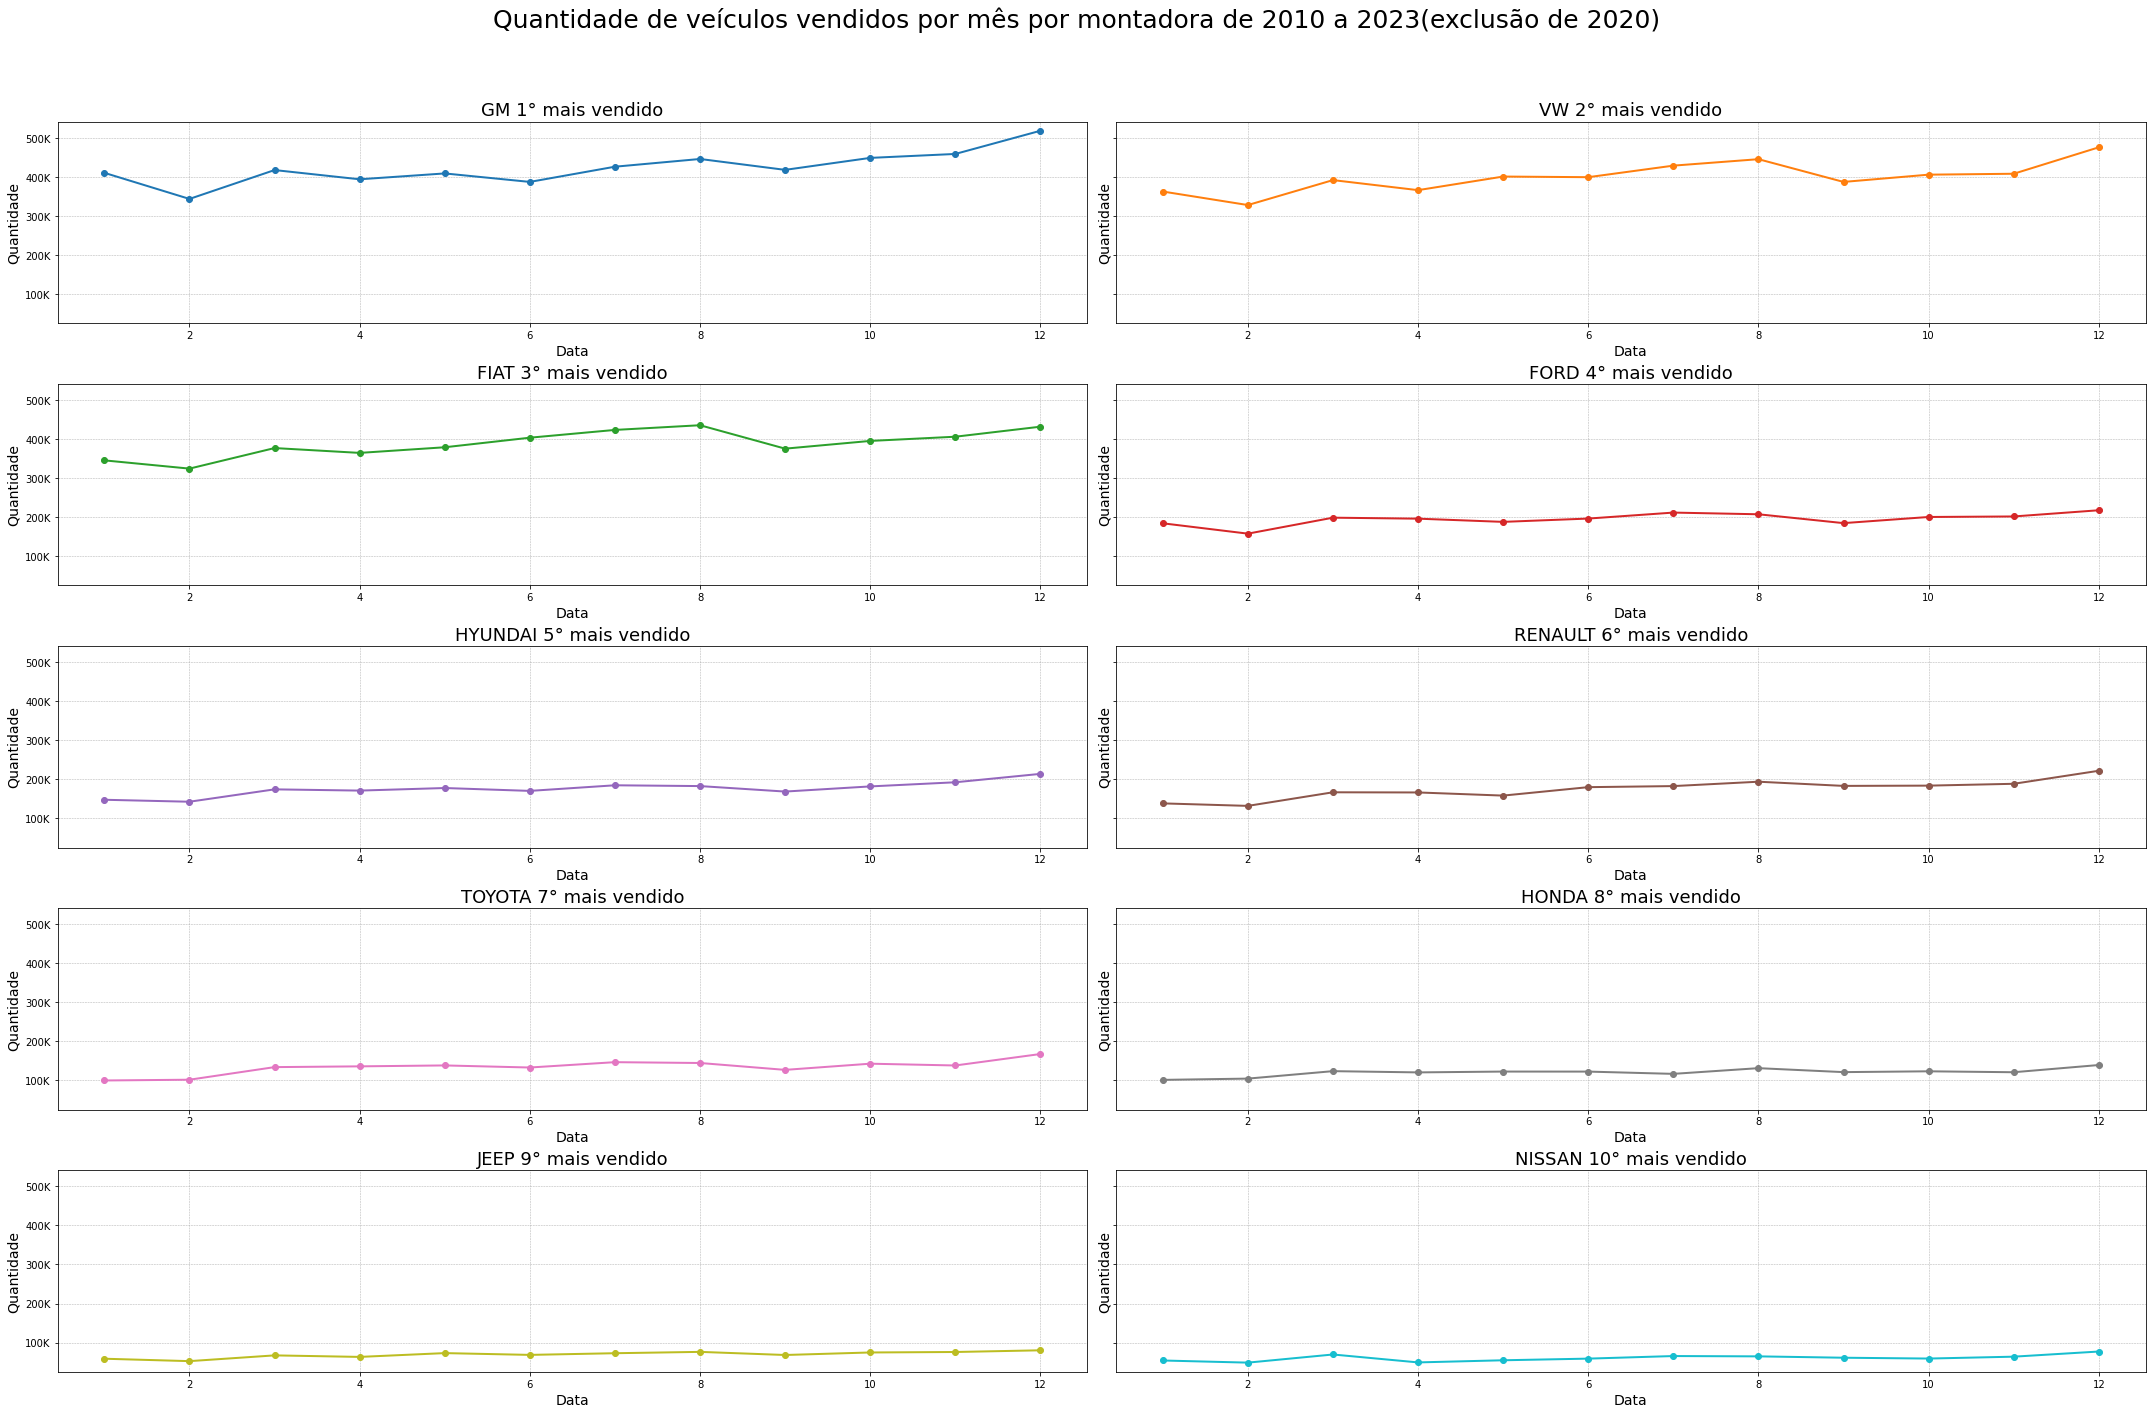

In [241]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0
# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listMontadoras):
    i = i+1
    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAuto = AnaliseAutoMontadora[AnaliseAutoMontadora['Modelo'] == model][['Data', 'Quantidade']]
    
    # Set 'Data' as the index
    AnaliseAuto.set_index('Data', inplace=True)
    
    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAuto, linestyle='-', marker='o', color=sns.color_palette('tab10')[listMontadoras.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora de 2010 a 2023(exclusão de 2020)', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

In [242]:
# Filtrar os dados de 2023
aggregated_data_montadora_month = aggregated_data_montadora[['Data', 'Quantidade', 'Modelo']].query('Data >= "2023-01-01" and Data <= "2023-12-01"')
aggregated_data_montadora_month['Data'] = aggregated_data_montadora_month['Data'].dt.month

AnaliseAutoMontadora = aggregated_data_montadora_month.groupby(['Data', 'Modelo'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

AnaliseAutoMontadora['Soma Acumulativa'] = AnaliseAutoMontadora.groupby(['Modelo'])['Quantidade'].cumsum()

# Filtrar as 10 primeiras montadoras para 2023
listMontadoras = []
listMontadoras = AnaliseAutoMontadora[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(10)['Modelo'].tolist()

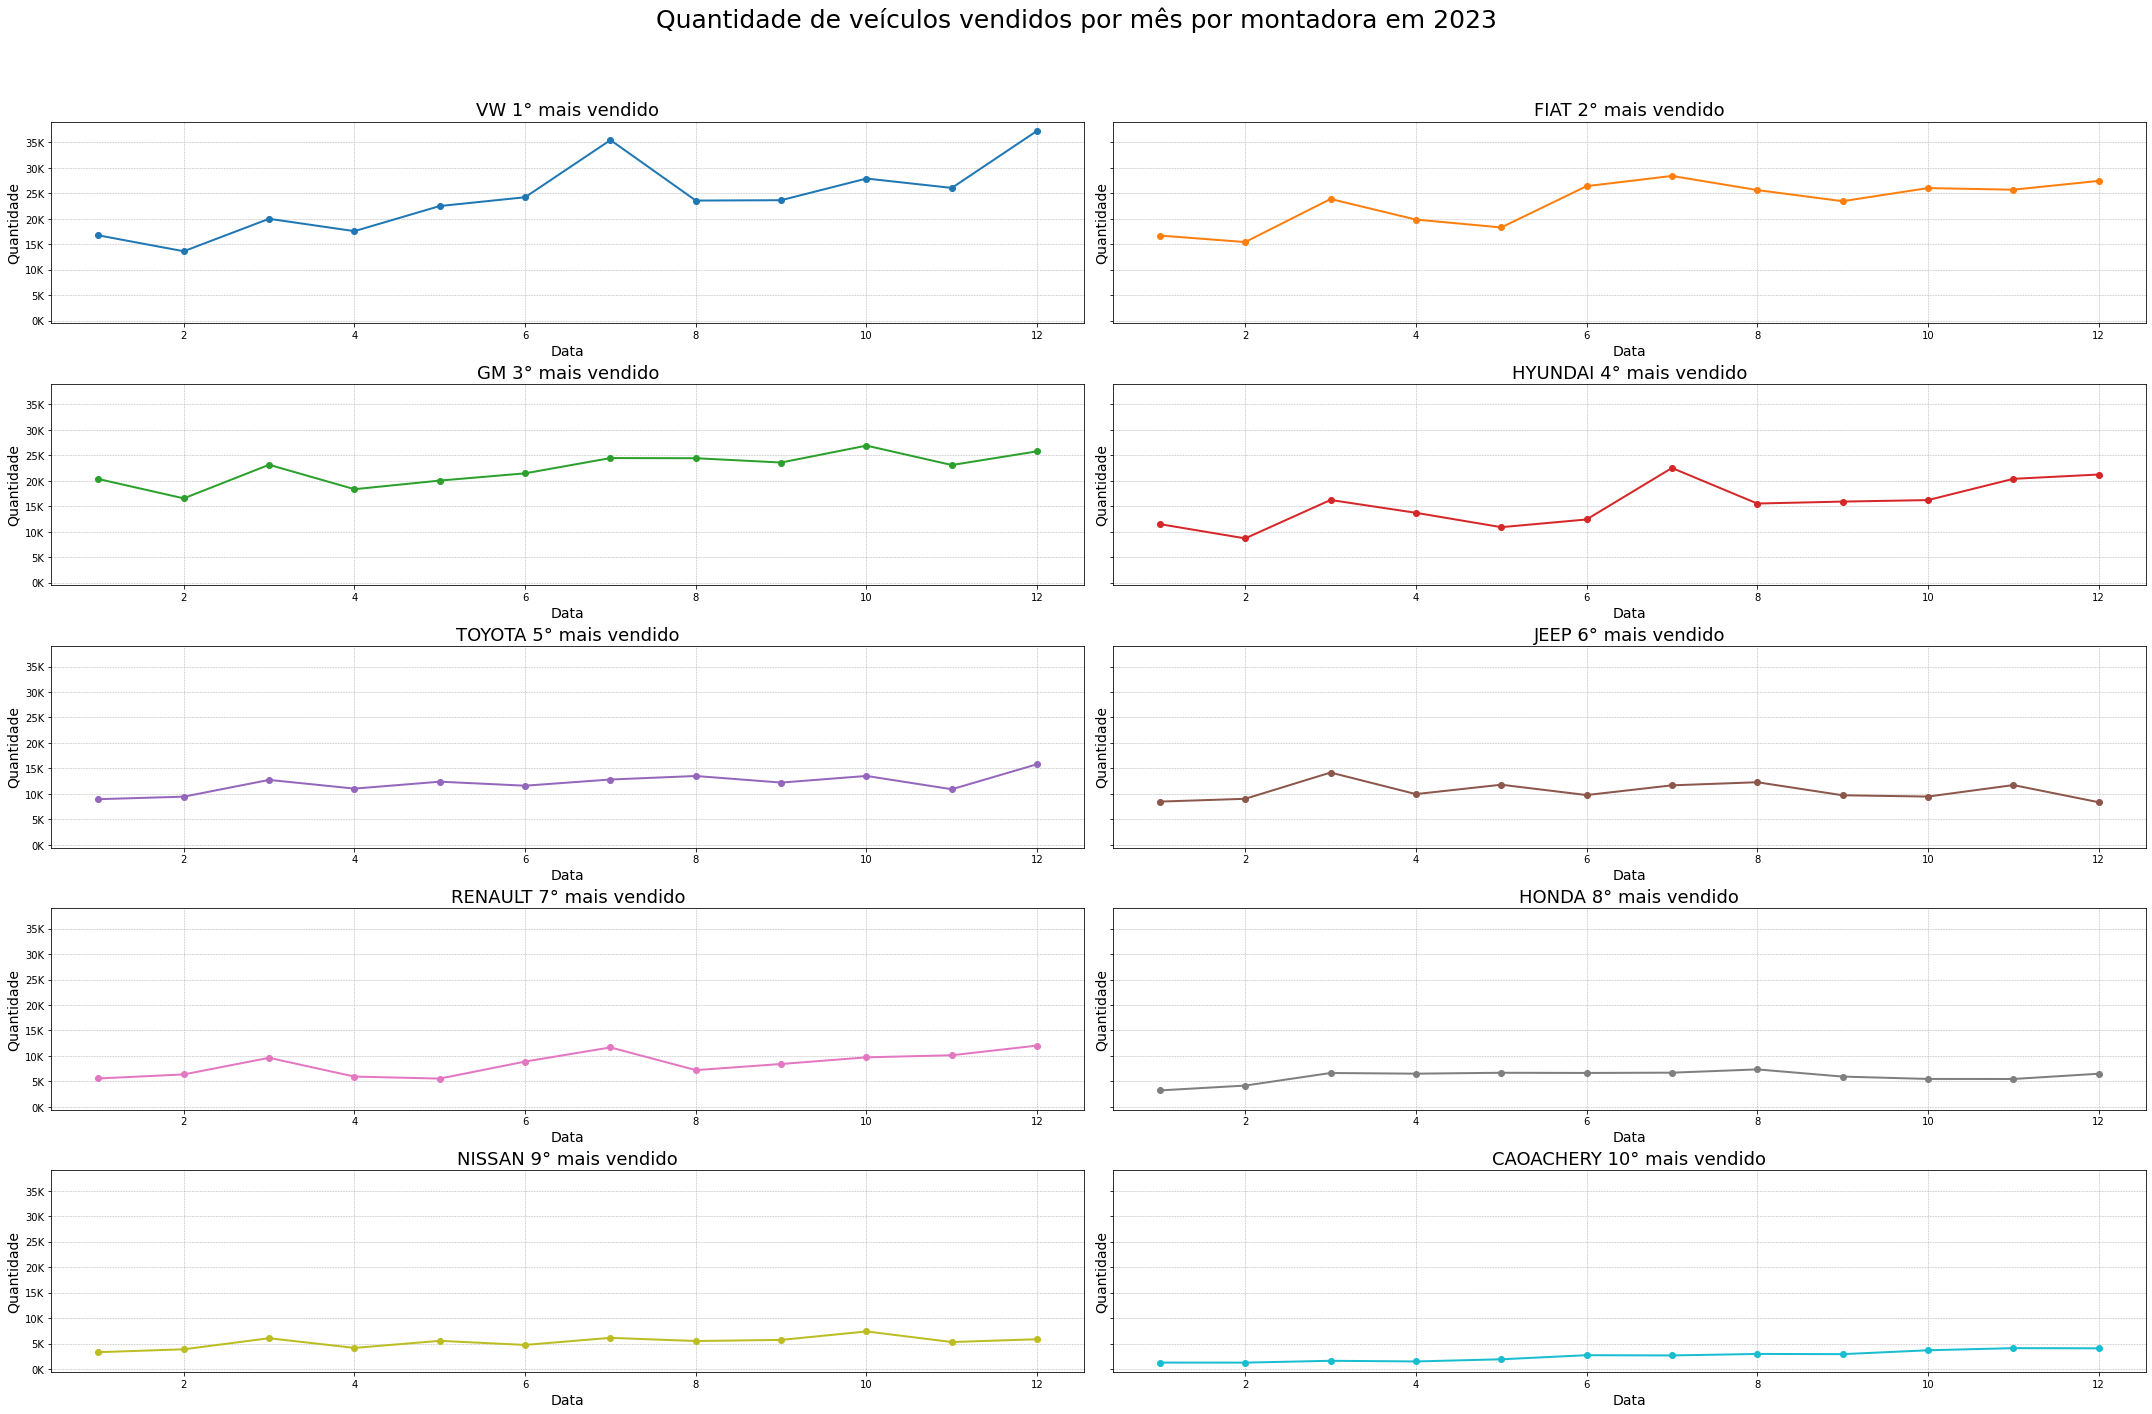

In [243]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0

# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listMontadoras):
    i = i+1
    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAuto = AnaliseAutoMontadora[AnaliseAutoMontadora['Modelo'] == model][['Data', 'Quantidade']]
    
    # Set 'Data' as the index
    AnaliseAuto.set_index('Data', inplace=True)
    
    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAuto, linestyle='-', marker='o', color=sns.color_palette('tab10')[listMontadoras.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora em 2023', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

In [244]:
# Filtrar os dados de 2024
aggregated_data_montadora_month = aggregated_data_montadora[['Data', 'Quantidade', 'Modelo']].query('Data >= "2024-01-01"')
aggregated_data_montadora_month['Data'] = aggregated_data_montadora_month['Data'].dt.month

AnaliseAutoMontadora = aggregated_data_montadora_month.groupby(['Data', 'Modelo'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

AnaliseAutoMontadora['Soma Acumulativa'] = AnaliseAutoMontadora.groupby(['Modelo'])['Quantidade'].cumsum()

# Filtrar as 10 primeiras montadoras para 2024
listMontadoras = []
listMontadoras = AnaliseAutoMontadora[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(10)['Modelo'].tolist()

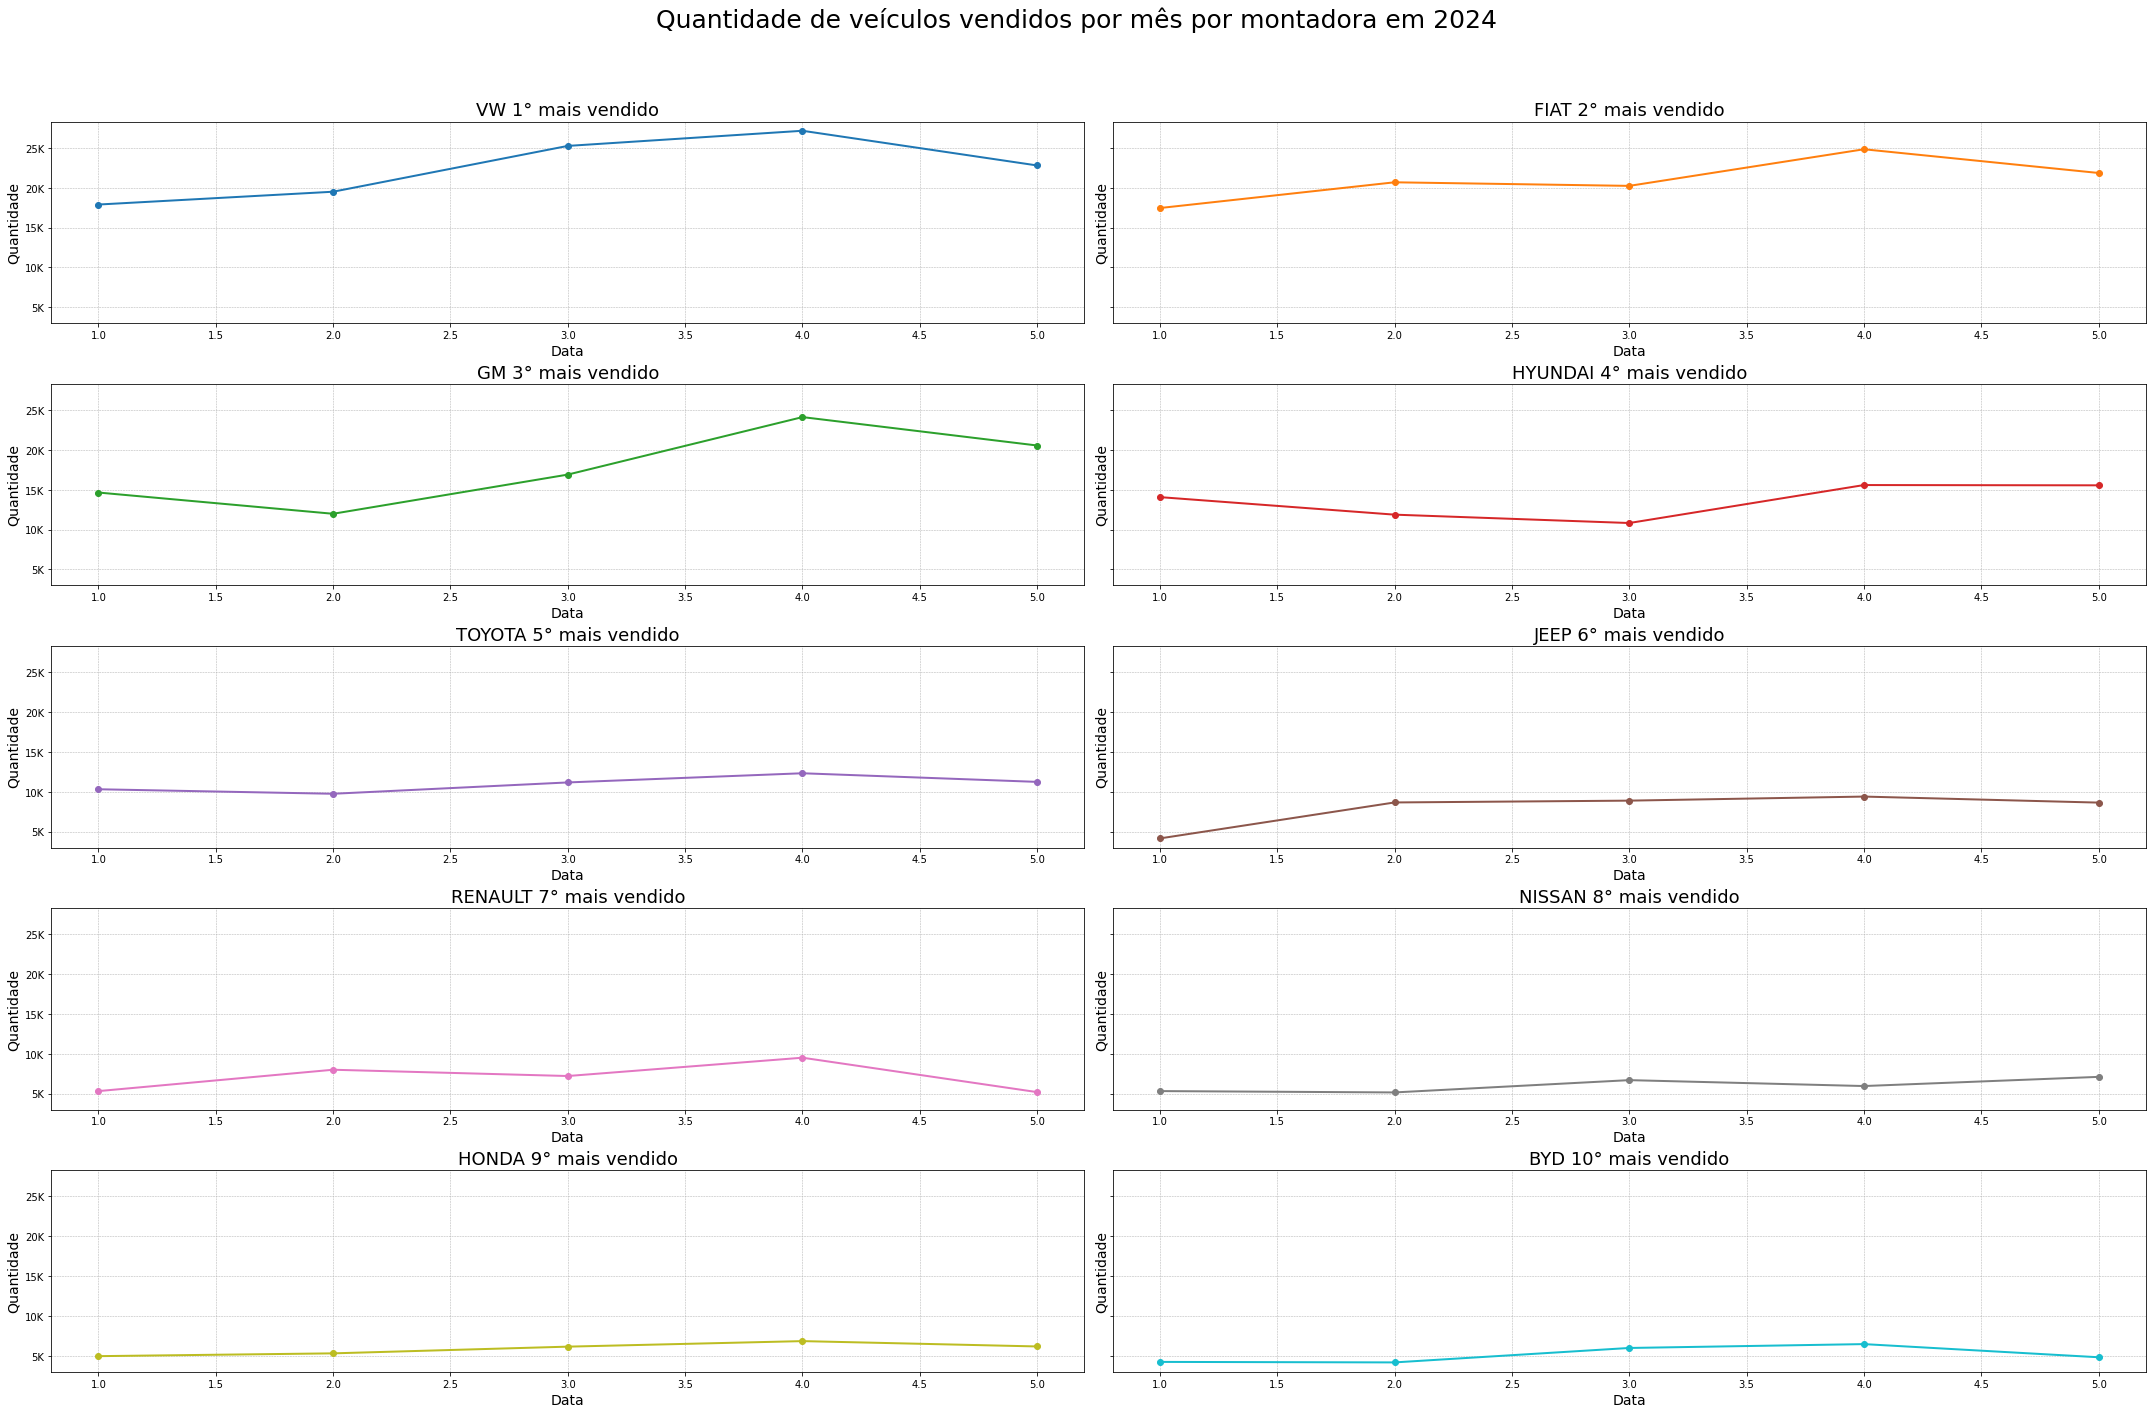

In [245]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0

# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listMontadoras):
    i = i+1
    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAuto = AnaliseAutoMontadora[AnaliseAutoMontadora['Modelo'] == model][['Data', 'Quantidade']]
    
    # Set 'Data' as the index
    AnaliseAuto.set_index('Data', inplace=True)
    
    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAuto, linestyle='-', marker='o', color=sns.color_palette('tab10')[listMontadoras.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora em 2024', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

In [246]:
# Filtrar os dados de 2022
aggregated_data_montadora_month = aggregated_data_montadora[['Data', 'Quantidade', 'Modelo']].query('Data >= "2022-01-01" and Data <= "2022-12-01"')
aggregated_data_montadora_month['Data'] = aggregated_data_montadora_month['Data'].dt.month

AnaliseAutoMontadora = aggregated_data_montadora_month.groupby(['Data', 'Modelo'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

AnaliseAutoMontadora['Soma Acumulativa'] = AnaliseAutoMontadora.groupby(['Modelo'])['Quantidade'].cumsum()

# Filtrar as 10 primeiras montadoras para 2022
listMontadoras = []
listMontadoras = AnaliseAutoMontadora[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(10)['Modelo'].tolist()

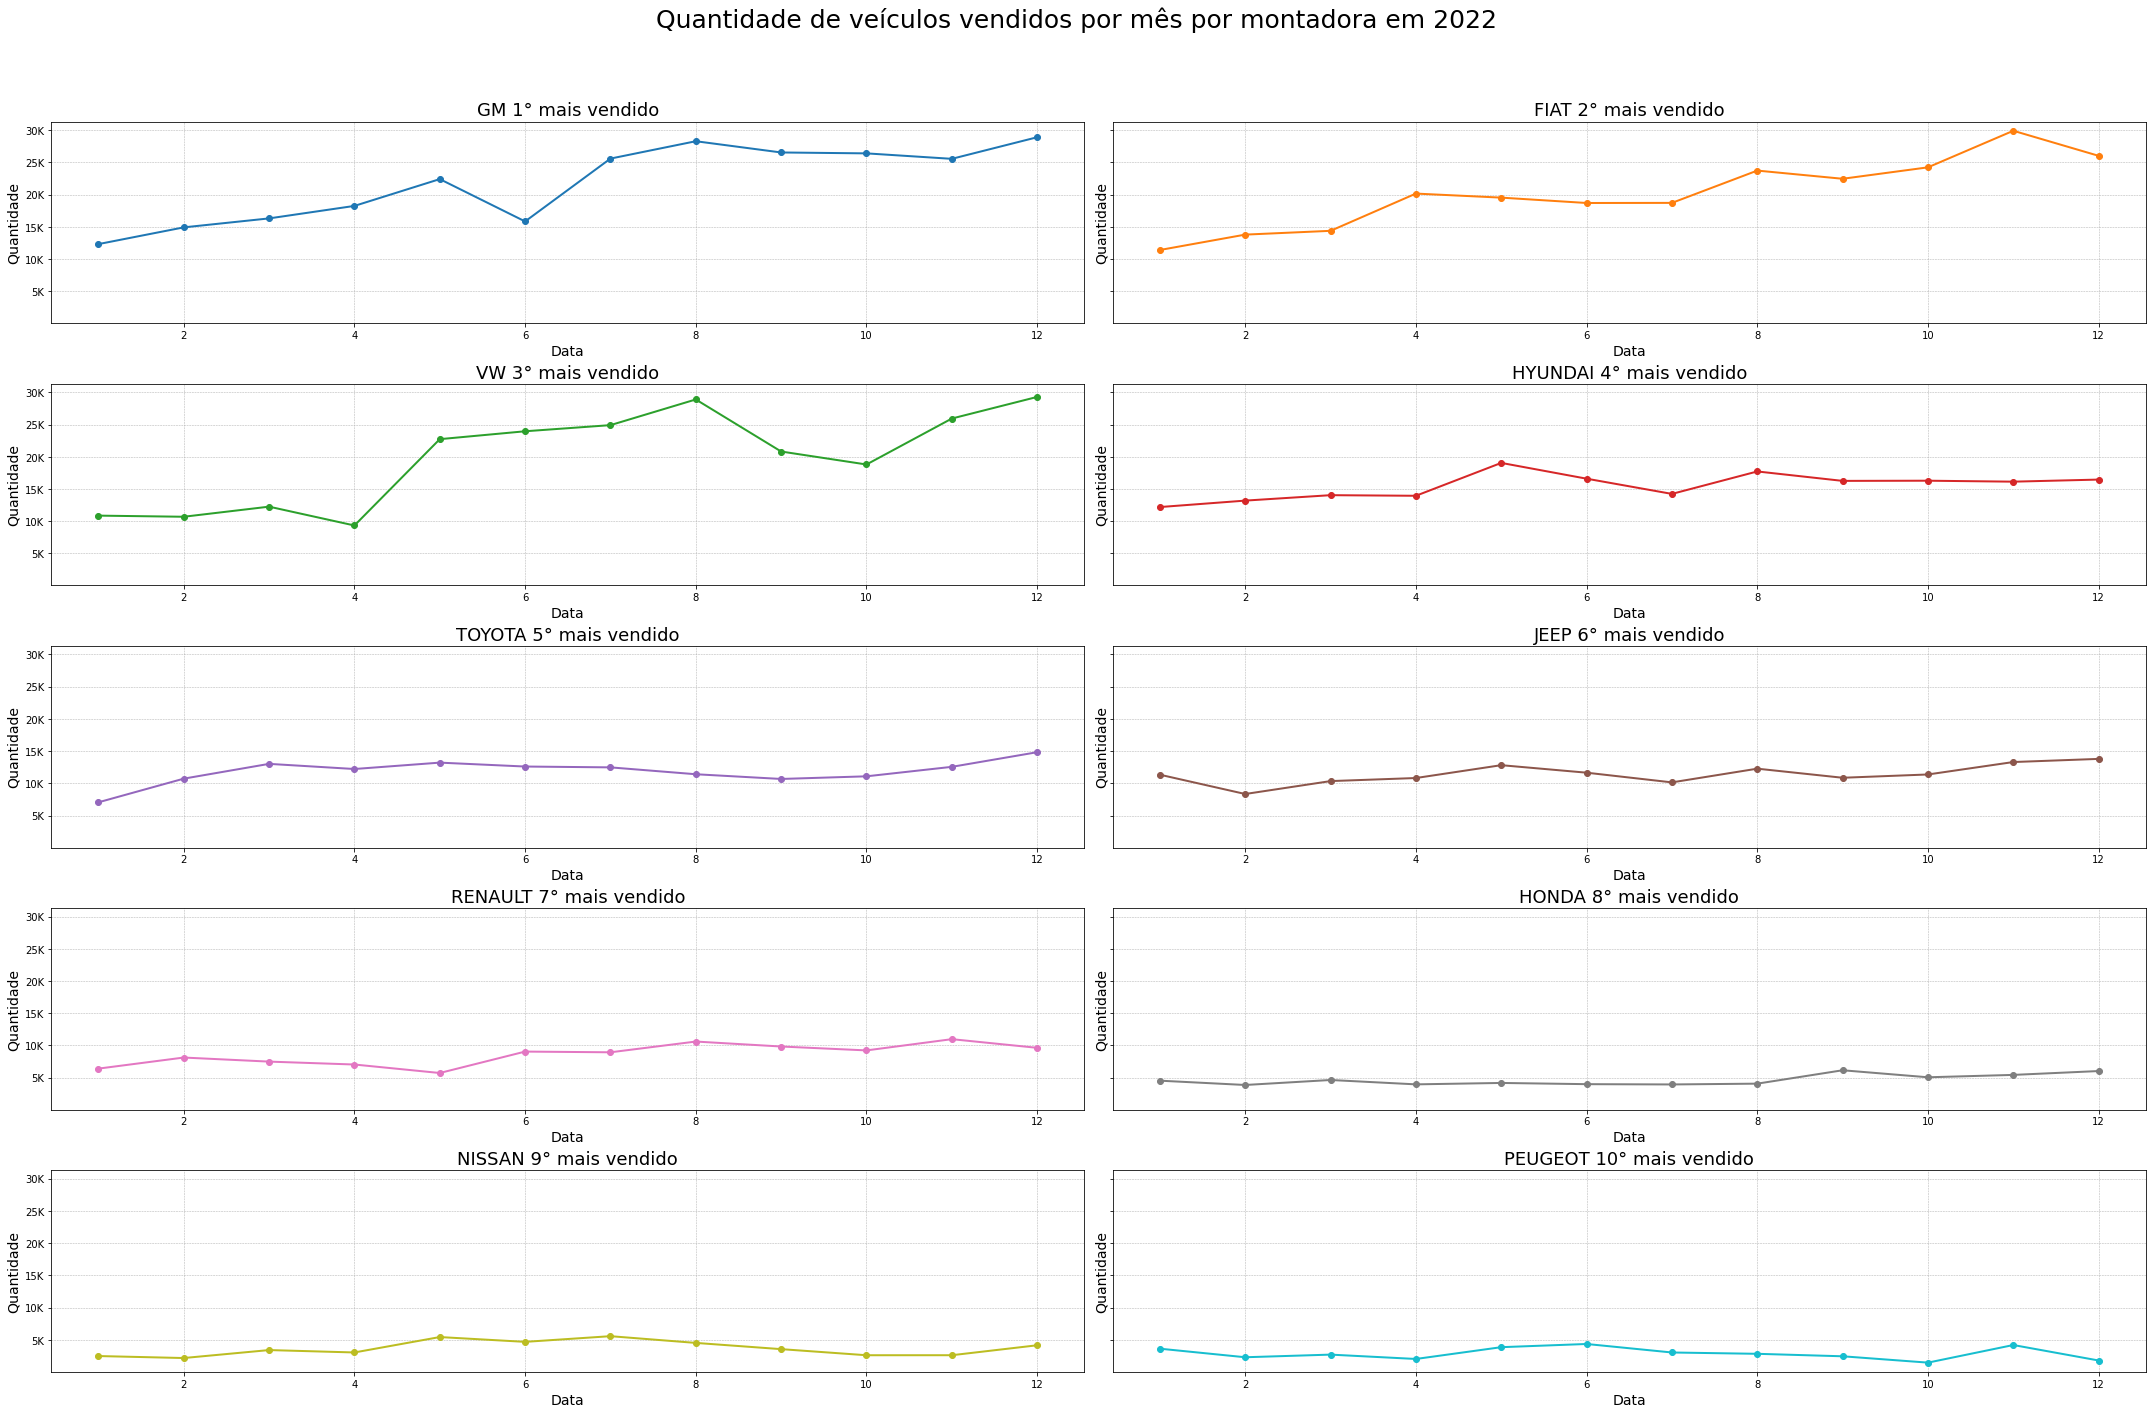

In [247]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0

# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listMontadoras):
    i = i+1
    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAuto = AnaliseAutoMontadora[AnaliseAutoMontadora['Modelo'] == model][['Data', 'Quantidade']]
    
    # Set 'Data' as the index
    AnaliseAuto.set_index('Data', inplace=True)
    
    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAuto, linestyle='-', marker='o', color=sns.color_palette('tab10')[listMontadoras.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora em 2022', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

In [248]:
# Filtrar os dados de 2022
aggregated_data_month = aggregated_data[['Data', 'Quantidade', 'Modelo']].query('Data >= "2022-01-01" and Data <= "2022-12-01"')
aggregated_data_month['Data'] = aggregated_data_month['Data'].dt.month

AnaliseAuto = aggregated_data_month.groupby(['Data', 'Modelo'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

AnaliseAuto['Soma Acumulativa'] = AnaliseAuto.groupby(['Modelo'])['Quantidade'].cumsum()

# Filtrar as 10 primeiras montadoras/modelo para 2022
listModelos = []
listModelos = AnaliseAuto[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(20)['Modelo'].tolist()

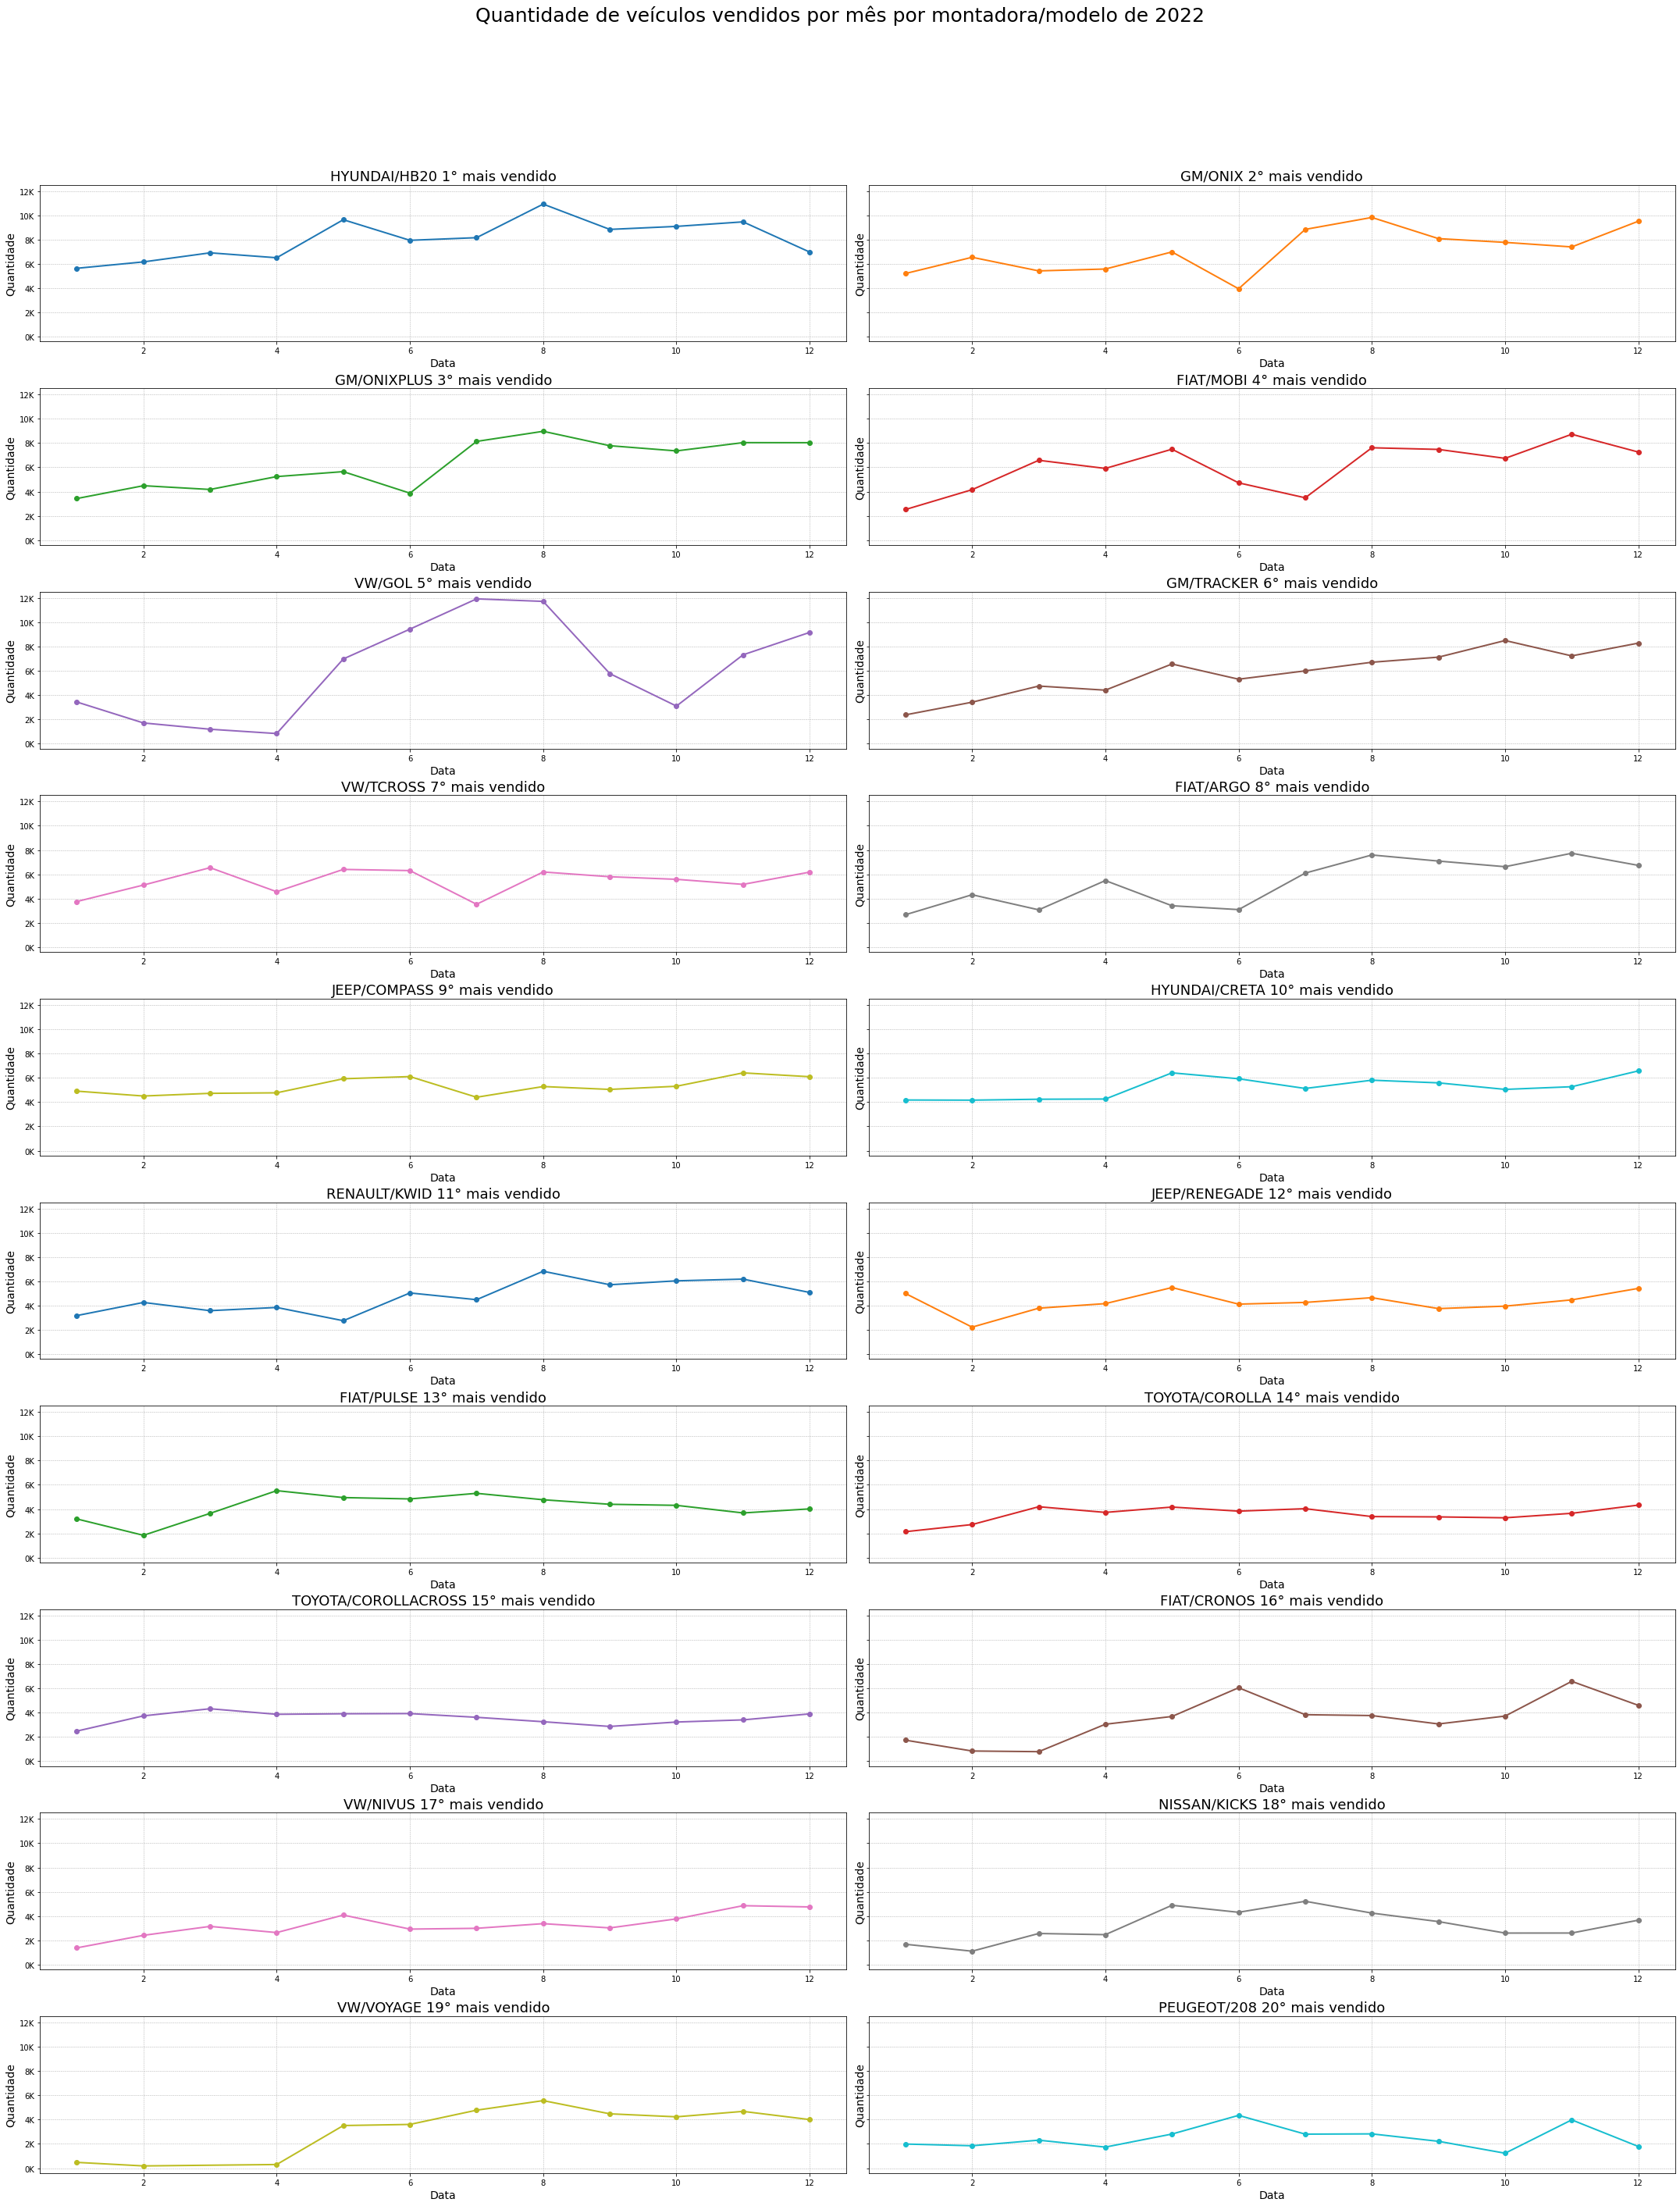

In [249]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(10, 2, figsize=(30, 40), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0
# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listModelos):
    i = i+1

    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAutoMonth = AnaliseAuto[AnaliseAuto['Modelo'] == model][['Data', 'Quantidade']]
    # Set 'Data' as the index
    AnaliseAutoMonth.set_index('Data', inplace=True)

    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAutoMonth, linestyle='-', marker='o', color=sns.color_palette('tab10')[listModelos.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora/modelo de 2022', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

In [250]:
# Filtrar os dados de 2024
aggregated_data_month = aggregated_data[['Data', 'Quantidade', 'Modelo']].query('Data >= "2024-01-01"')
aggregated_data_month['Data'] = aggregated_data_month['Data'].dt.month

AnaliseAuto = aggregated_data_month.groupby(['Data', 'Modelo'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

AnaliseAuto['Soma Acumulativa'] = AnaliseAuto.groupby(['Modelo'])['Quantidade'].cumsum()

# Filtrar as 10 primeiras montadoras/modelo para 2024
listModelos = []
listModelos = AnaliseAuto[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(20)['Modelo'].tolist()

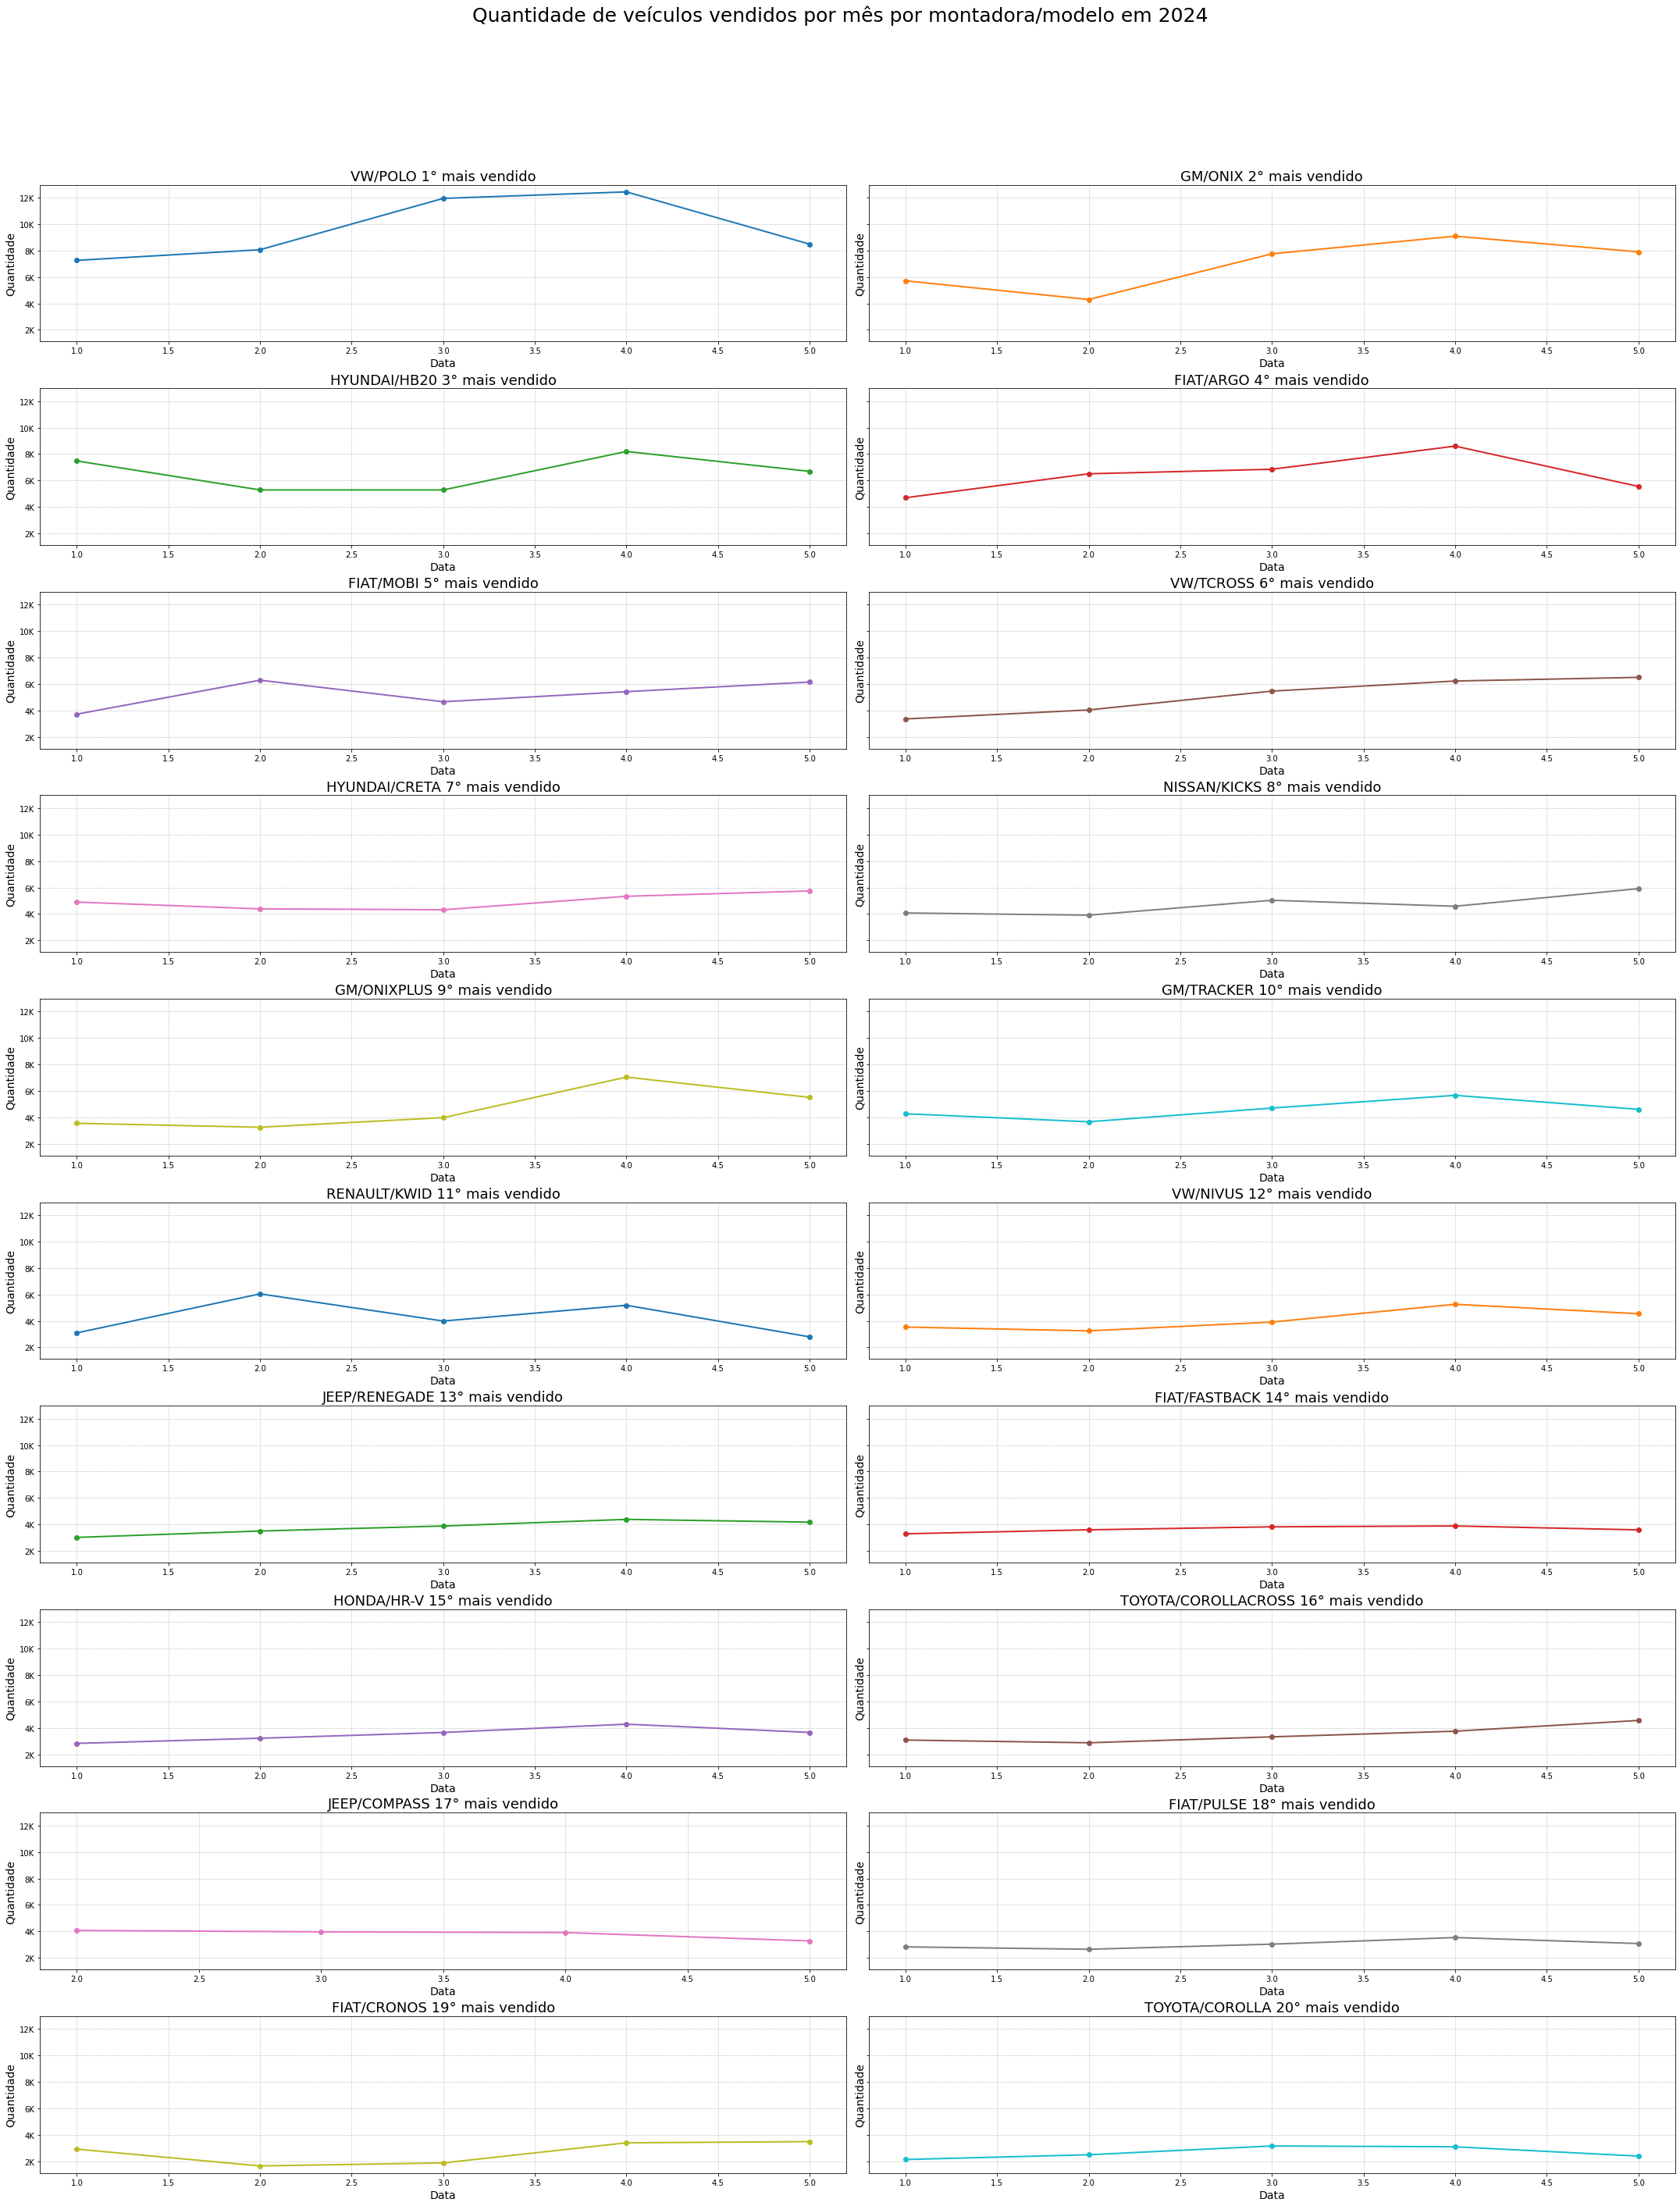

In [251]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(10, 2, figsize=(30, 40), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0

# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listModelos):
    i = i+1
    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAutoMonth = AnaliseAuto[AnaliseAuto['Modelo'] == model][['Data', 'Quantidade']]
    
    # Set 'Data' as the index
    AnaliseAutoMonth.set_index('Data', inplace=True)
    
    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAutoMonth, linestyle='-', marker='o', color=sns.color_palette('tab10')[listModelos.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora/modelo em 2024', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

In [252]:
# Filtrar os dados de 2023
aggregated_data_month = aggregated_data[['Data', 'Quantidade', 'Modelo']].query('Data >= "2023-01-01" and Data <= "2023-12-01"')
aggregated_data_month['Data'] = aggregated_data_month['Data'].dt.month

AnaliseAuto = aggregated_data_month.groupby(['Data', 'Modelo'])['Quantidade'].sum().reset_index().sort_values('Data', ascending=True)

AnaliseAuto['Soma Acumulativa'] = AnaliseAuto.groupby(['Modelo'])['Quantidade'].cumsum()

# Filtrar as 10 primeiras montadoras/modelo para 2023
listModelos = []
listModelos = AnaliseAuto[['Soma Acumulativa', 'Modelo']].sort_values(by=['Soma Acumulativa'], ascending=False).drop_duplicates(subset='Modelo').head(20)['Modelo'].tolist()

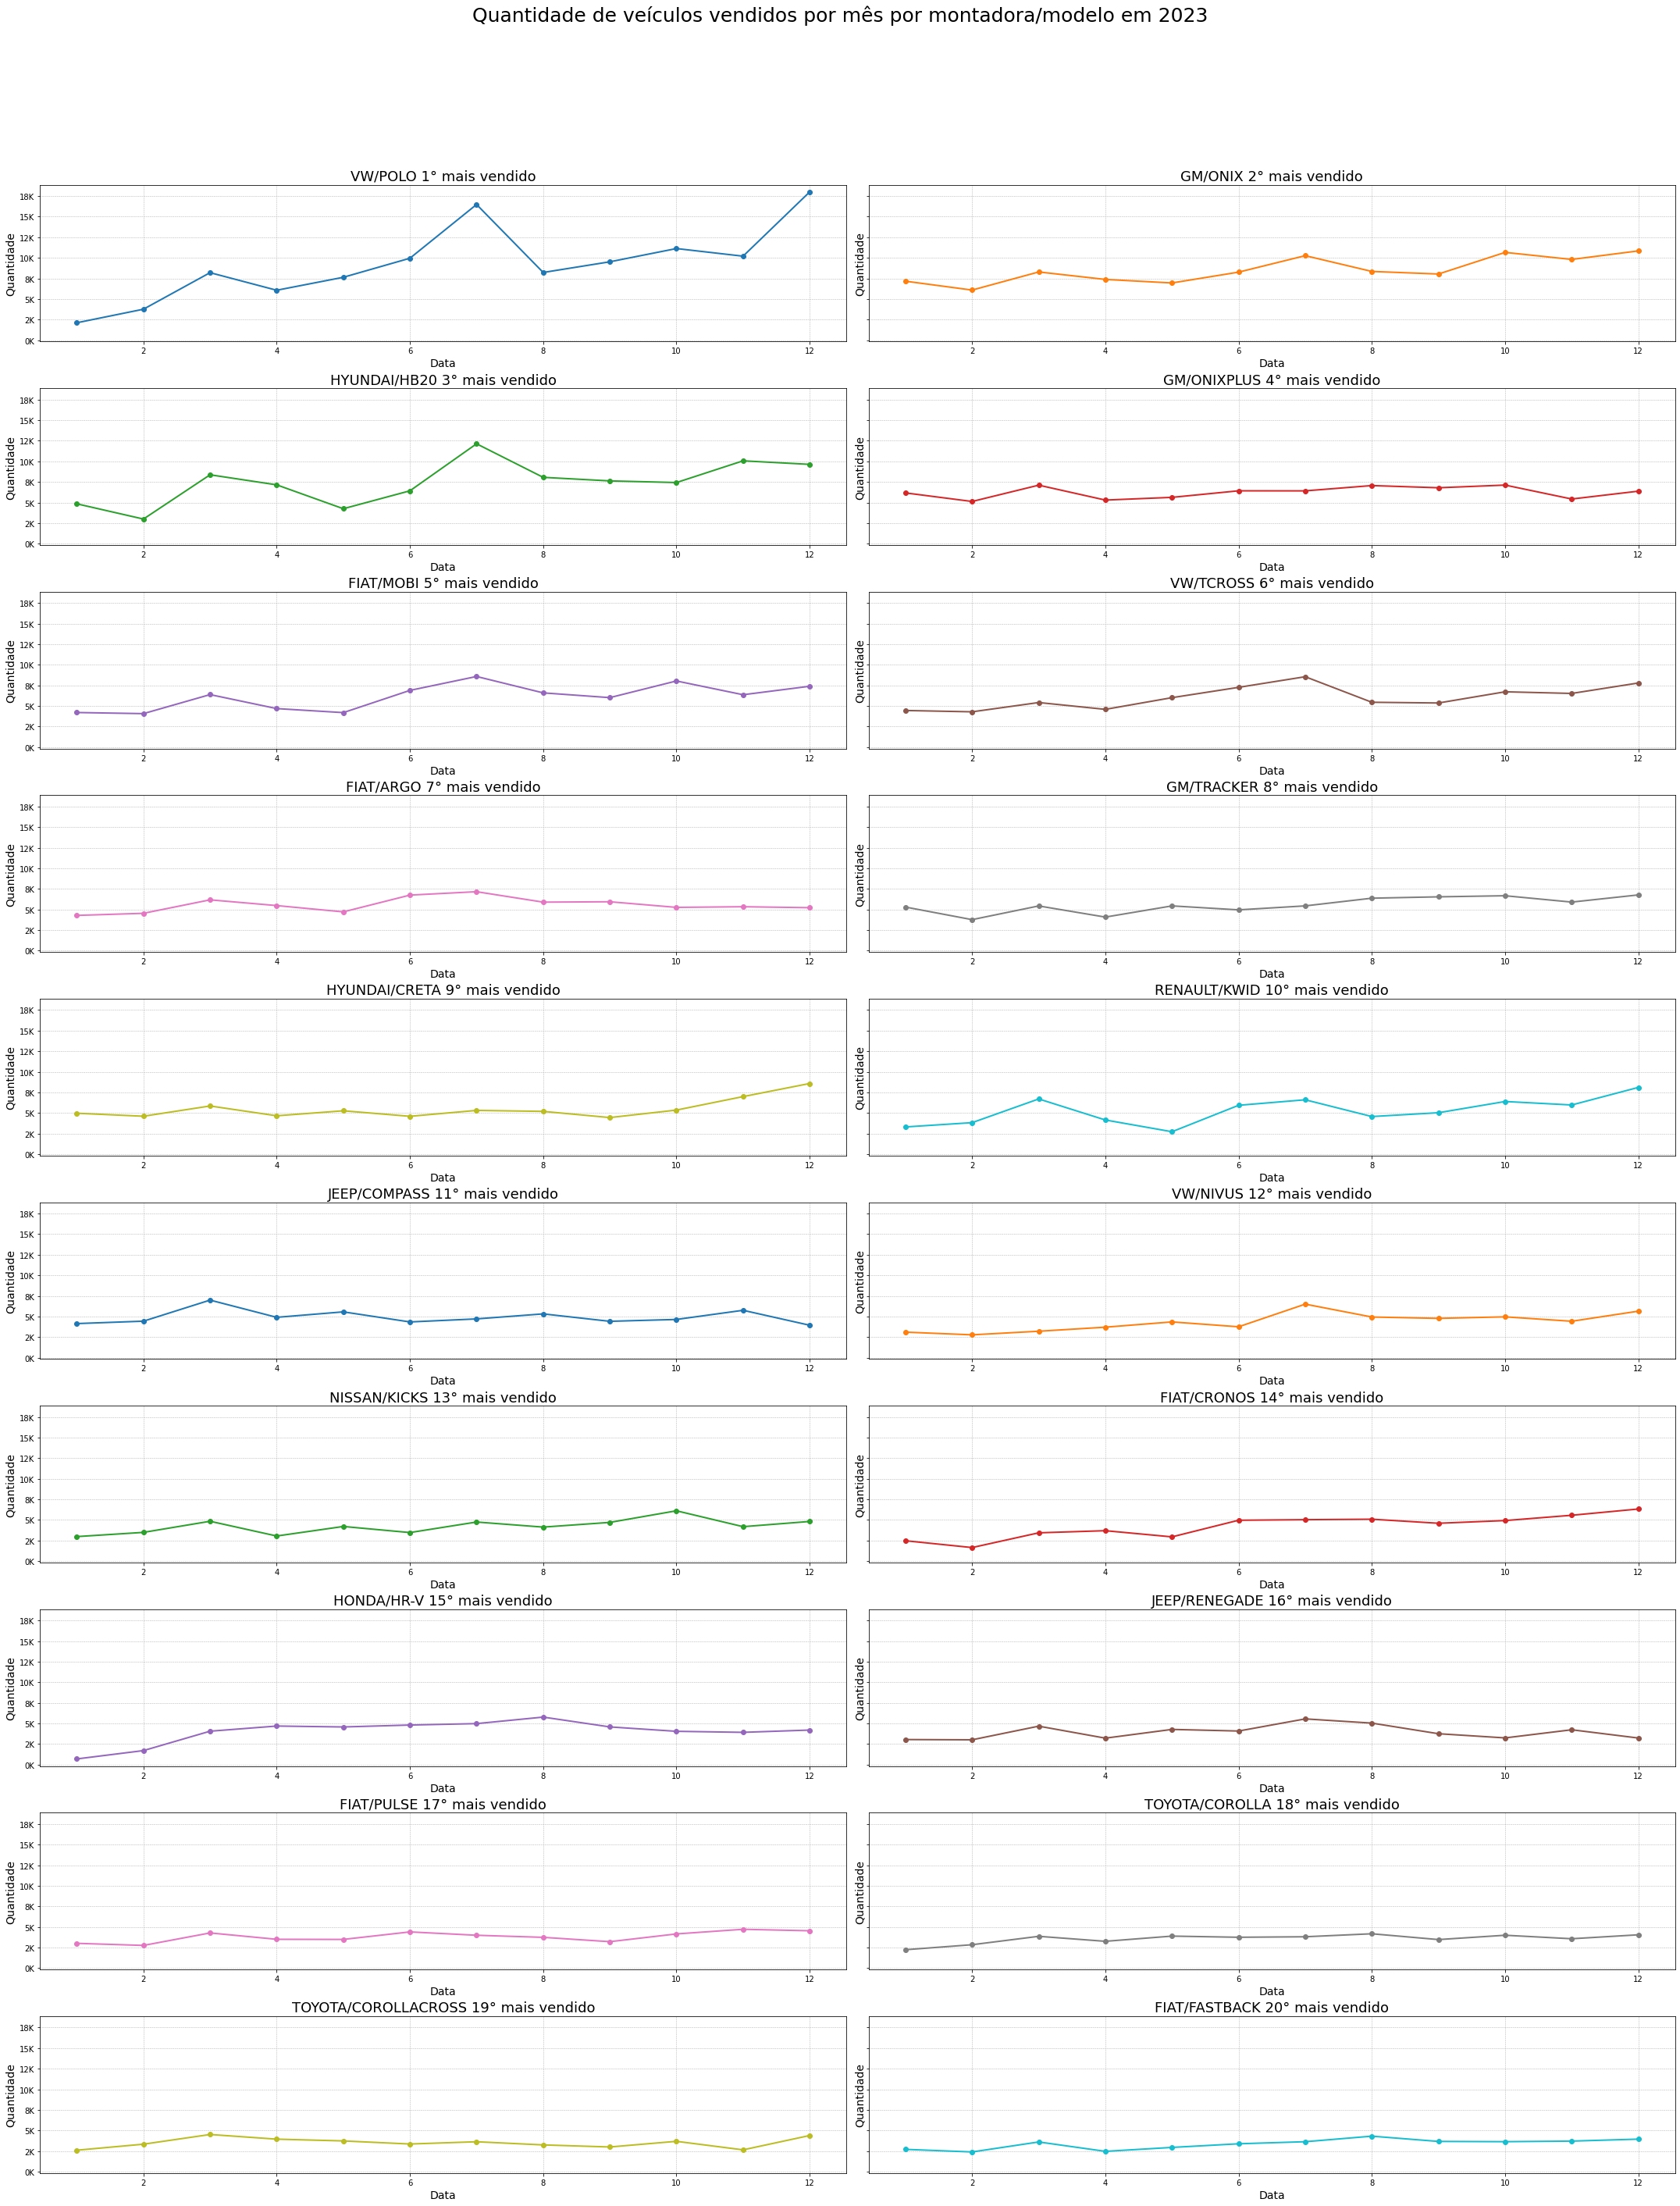

In [253]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x*1e-3:,.0f}K'

# listModelos contains the top 10 unique car models
# Create a figure with 10 subplots (5 rows and 2 columns)
fig, axes = plt.subplots(10, 2, figsize=(30, 40), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0

# Iterate through each model and corresponding subplot axis
for ax, model in zip(axes, listModelos):
    i = i+1
    # Filter the DataFrame to include only the rows for the specific model
    AnaliseAutoMonth = AnaliseAuto[AnaliseAuto['Modelo'] == model][['Data', 'Quantidade']]
    
    # Set 'Data' as the index
    AnaliseAutoMonth.set_index('Data', inplace=True)
    
    # Plot the resampled data with enhanced visuals
    ax.plot(AnaliseAutoMonth, linestyle='-', marker='o', color=sns.color_palette('tab10')[listModelos.index(model) % 10], linewidth=2)
    ax.set_xlabel('Data', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'{model} {i}° mais vendido', fontsize=18)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Quantidade de veículos vendidos por mês por montadora/modelo em 2023', fontsize=25)
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the main title

plt.show()

Teste estatísticos <br>
Criar gráficos de séries temporais dos dados de vendas de veículos para identificar tendências, sazonalidades e padrões cíclicos. <br> 
Usar gráficos de linha, decomposição de séries temporais e autocorrelações (ACF e PACF).


Uma série temporal é dita estacionária quando suas propriedades estatísticas, como média, variância e autocorrelação, são constantes ao longo do tempo.<br> Em outras palavras, uma série temporal estacionária não apresenta tendência nem sazonalidade, e as flutuações em torno de um valor médio constante são <br> aproximadamente iguais ao longo do tempo. <br>
ARIMA (AutoRegressive Integrated Moving Average) é usado para séries temporais que são estacionárias e não apresentam sazonalidade.<br>
SARIMA (Seasonal AutoRegressive Integrated Moving Average) é uma extensão do ARIMA que incorpora componentes sazonais. É usado quando há um padrão sazonal <br> claro nos dados.<br>

In [258]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

AttributeError: module 'numpy' has no attribute 'MachAr'

In [256]:
# Dados pos modelos
aggregated_data_month = aggregated_data[['Data', 'Quantidade', 'Modelo', 'Soma Acumulativa']]
# .query('Data < "2020-01-01" or Data > "2020-12-01"')
AnaliseAutoModelo = aggregated_data_month[aggregated_data_month['Modelo'] == 'GM/ONIX'][['Data', 'Quantidade']]

# Dados por montadora
aggregated_data_montadora_month = aggregated_data_montadora[['Data', 'Quantidade', 'Modelo', 'Soma Acumulativa']]
# .query('Data < "2020-01-01" or Data > "2020-12-01"')
AnaliseAutoMontadora = aggregated_data_montadora_month[aggregated_data_montadora_month['Modelo'] == 'GM'][['Data', 'Quantidade']]

In [257]:
# Teste de estacionaridade (ADF)
result = adfuller(AnaliseAutoMontadora['Quantidade'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF e PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(AnaliseAutoMontadora['Quantidade'], lags=40, ax=plt.gca())
plt.title('Autocorrelação (ACF)')

plt.subplot(122)
plot_pacf(AnaliseAutoMontadora['Quantidade'], lags=40, ax=plt.gca())
plt.title('Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

NameError: name 'adfuller' is not defined


Com os valores de ADF Statistic e p-value fornecidos, podemos interpretar a estacionaridade da série temporal:<br>

ADF Statistic: -1.31<br>
p-value: 0.63<br>
Interpretação dos Resultados:<br>
Teste de Dickey-Fuller Aumentado (ADF):<br>
O teste ADF tem a hipótese nula (𝐻0) de que a série temporal não é estacionária (possui uma raiz unitária).<br>
Se o valor p (p-value) for menor que o nível de significância (geralmente 0.05), rejeitamos a hipótese nula e concluímos que a série é estacionária.<br>
Se o valor p for maior que o nível de significância, não rejeitamos a hipótese nula, sugerindo que a série não é estacionária.<br>
Com seus valores:<br>
p-value de 0.63: Como esse valor é maior que 0.05, não rejeitamos a hipótese nula. Isso sugere que a série temporal não é estacionária.<br>
ADF Statistic de -1.31: Este valor não é suficientemente negativo para rejeitar a hipótese nula.<br>
Próximos Passos:<br>
Transformações para Estacionaridade:<br>

Diferenciação: Aplique a diferenciação na série para tentar tornar a série estacionária. A primeira diferença pode ser calculada subtraindo cada valor pelo valor anterior.<br>
Transformações de Log: Às vezes, uma transformação logarítmica pode ajudar a estabilizar a variância.
Reaplicação do Teste ADF:<br>

Depois de aplicar a diferenciação ou outras transformações, reaplique o teste ADF para verificar se a série se tornou estacionária.<br>

ADF Statistic: -2.9712651064926527
p-value: 0.03766641567478312


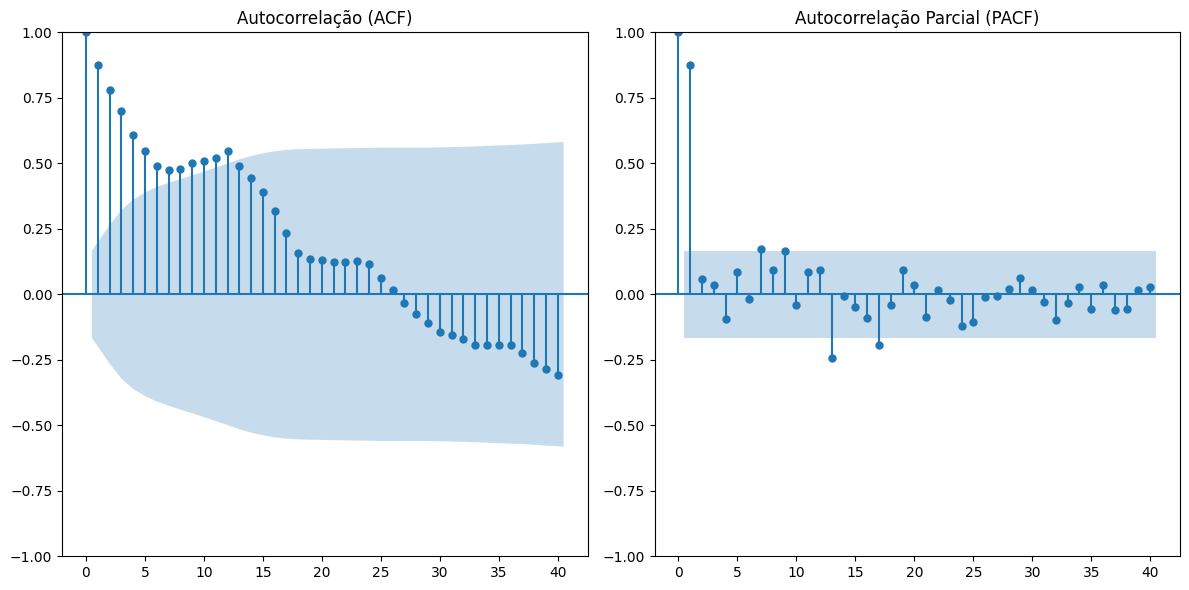

In [ ]:
# Teste de estacionaridade (ADF)
result = adfuller(AnaliseAutoModelo['Quantidade'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF e PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(AnaliseAutoModelo['Quantidade'], lags=40, ax=plt.gca())
plt.title('Autocorrelação (ACF)')

plt.subplot(122)
plot_pacf(AnaliseAutoModelo['Quantidade'], lags=40, ax=plt.gca())
plt.title('Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

Com os valores de ADF Statistic e p-value fornecidos para o segundo conjunto de dados, podemos interpretar a estacionaridade da série temporal<br> AnaliseAutoModelo['Quantidade']:<br>

ADF Statistic: -2.9713<br>
p-value: 0.0377<br>
Interpretação dos Resultados:<br>
p-value de 0.0377: Como este valor é menor que 0.05, rejeitamos a hipótese nula. Isso sugere que a série temporal é estacionária.<br>
ADF Statistic de -2.9713: Este valor é suficientemente negativo para rejeitar a hipótese nula.<br>
Próximos Passos:<br>
Como a série AnaliseAutoModelo['Quantidade'] é estacionária, você pode seguir com a modelagem de forecast sem a necessidade de diferenciação. No entanto,<br>
ainda é útil visualizar os gráficos de ACF e PACF para entender a autocorrelação e a estrutura dos dados. Esses gráficos ajudarão na escolha dos parâmetros <br> para modelos como ARIMA.

https://api.bcb.gov.br/dados/serie/bcdata.sgs.1373/dados?formato=csv
API para dados de montadoras

Irei avaliar os dados para os Modelos pois apresenta sazonalidade e rejeitou a hipótese. Então não precisa realizar transformações logarítmas.

Interpretação dos Componentes da Decomposição Sazonal<br>
Tendência (Trend):<br>

Interpretação: Mostra a direção geral dos dados ao longo do tempo. Pode indicar um aumento, diminuição ou estabilidade dos valores ao longo do período analisado.<br>
O que observar: Uma tendência clara sugere que os dados têm uma componente de tendência significativa que pode precisar ser modelada ou diferenciada.

Sazonalidade (Seasonal):<br>
Interpretação: Mostra padrões repetitivos nos dados em intervalos regulares (mensais, trimestrais, anuais, etc.). Representa variações que ocorrem devido a fatores sazonais.<br>
O que observar: A presença de padrões sazonais fortes e repetitivos indica que a sazonalidade deve ser incluída no modelo, o que é um sinal de que um modelo SARIMA pode ser apropriado.<br>

Resíduo (Residual):<br>
Interpretação: Representa a parte dos dados que não é explicada pela tendência ou sazonalidade. Essencialmente, é o "ruído" ou componente aleatório da série.<br>
O que observar: Os resíduos devem se parecer com um ruído branco, ou seja, devem ser aleatórios e não apresentar padrões óbvios. Se houver padrões, pode indicar que a decomposição não capturou completamente a estrutura dos dados.<br>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Análise para as montadoras de Tendência, Sazonalidade e Resíduo

In [ ]:
AnaliseAuto = AnaliseAutoMontadora.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

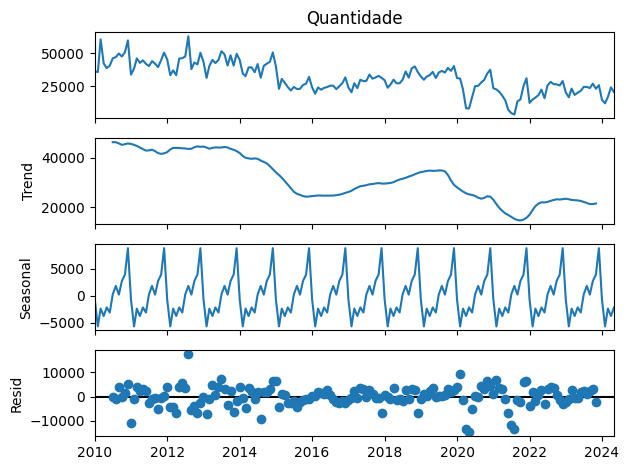

In [ ]:
decomposition = seasonal_decompose(AnaliseAuto['Quantidade'], model='additive')
decomposition.plot()
plt.show()

Análise para as modelos/montadora de Tendência, Sazonalidade e Resíduo

In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

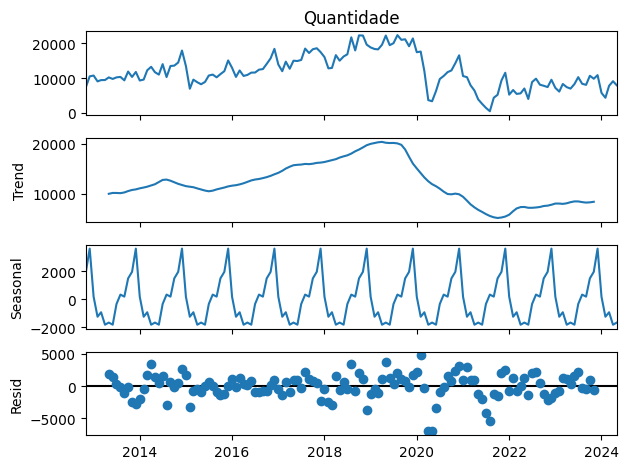

In [ ]:
decomposition = seasonal_decompose(AnaliseAuto['Quantidade'], model='additive')
decomposition.plot()
plt.show()

Plote a Função de Autocorrelação (ACF) e a Função de Autocorrelação Parcial (PACF). <br>
A ACF e PACF ajudam a determinar os valores de p e q para ARIMA e os valores de 𝑃 e 𝑄 para SARIMA.
Decisão entre ARIMA e SARIMA:<br>
Se a série NÃO apresentar sazonalidade: Use um modelo ARIMA.<br>
Se a série APRESENTAR sazonalidade: Use um modelo SARIMA.<br>

Definir os valores de 𝑃, 𝐷, 𝑄, e s para um modelo SARIMA pode ser um processo iterativo que envolve análise visual, estatísticas de <br>diagnóstico e tentativas. Aqui está um guia passo a passo para ajudar a determinar esses parâmetros.<br>

Definir os Parâmetros: 𝑝 e 𝑞: Determinados pelos gráficos de PACF e ACF, respectivamente.<br>
𝑑: Número de diferenciações necessárias para tornar a série estacionária.<br>
𝑃 e 𝑄: Determinados pelos gráficos de PACF e ACF das componentes sazonais.<br>
𝐷: Número de diferenciações sazonais necessárias.<br>
𝑠: Período sazonal (exemplo: 12 para dados mensais).<br>

Análise dos Gráficos ACF e PACF<br>
Função de Autocorrelação (ACF):<br>

Mostra a correlação entre a série temporal e ela mesma em diferentes defasagens (lags).<br>
É usada para identificar a ordem 𝑞 (número de termos de média móvel) e <br>
𝑄 (número de termos de média móvel sazonais).<br>
Função de Autocorrelação Parcial (PACF):<br>
Mostra a correlação entre a série temporal e ela mesma em diferentes defasagens, mas controlando as autocorrelações em defasagens intermediárias.<br>
É usada para identificar a ordem 𝑝 (número de termos autoregressivos) e 𝑃 (número de termos autoregressivos sazonais).<br>
Determinando os Parâmetros 𝑝, 𝑞, 𝑃, 𝑄 Q<br>
Parâmetros não sazonais (𝑝 e 𝑞) <br>
𝑝 (ordem AR): Determinado pelo gráfico PACF. Procure por defasagens (lags) onde a PACF corta a linha de significância pela primeira vez.<br>
𝑞 (ordem MA): Determinado pelo gráfico ACF. Procure por defasagens (lags) onde a ACF corta a linha de significância pela primeira vez.<br>
Parâmetros sazonais (𝑃 e 𝑄)<br>
𝑃 (ordem sazonal AR): Determinado pelo gráfico PACF sazonal. Procure por defasagens sazonais (ex: 12, 24, 36 para dados mensais) onde a PACF sazonal <br> corta a linha de significância.<br>
𝑄 (ordem sazonal MA): Determinado pelo gráfico ACF sazonal. Procure por defasagens sazonais (ex: 12, 24, 36 para dados mensais) onde a ACF sazonal corta <br> a linha de significância.<br>


D = 0: Se a série original já é estacionária sazonalmente.
𝐷 = 1: Se uma diferenciação sazonal torna a série estacionária.
𝐷 = 2: Se duas diferenciações sazonais são necessárias para tornar a série estacionária.

Teste ADF na Série Original: Realize o teste ADF na série original.
Verificação de Estacionaridade: Se 𝑝 < 0, 05 p< 0,05, a série é estacionária.
Definição de 𝐷: Se a série é estacionária, 𝐷 = 0.
Ajuste do Modelo SARIMA: Use 𝐷 = 0 ao ajustar o modelo SARIMA.

AIC (Akaike Information Criterion)<br>
Definição: O AIC é uma medida usada para comparar a qualidade de diferentes modelos estatísticos, levando em conta tanto a bondade de ajuste quanto a complexidade do modelo.<br>
Fórmula:<br>
AIC=2k−2ln(L)<br>
k é o número de parâmetros no modelo.<br>
L é a função de verossimilhança do modelo ajustado.<br>
Interpretação: Modelos com valores de AIC menores são preferíveis, pois indicam um melhor equilíbrio entre a qualidade do ajuste e a complexidade do modelo.
BIC (Bayesian Information Criterion)<br>
Definição: O BIC é semelhante ao AIC, mas inclui uma penalidade mais forte para modelos com muitos parâmetros. Isso torna o BIC mais conservador em termos de seleção de modelos.<br>
Fórmula: BIC=kln(n)−2ln(L)<br>
k é o número de parâmetros no modelo.<br>
n é o número de observações.<br>
L é a função de verossimilhança do modelo ajustado.<br>
Interpretação: Assim como o AIC, modelos com valores de BIC menores são preferíveis. No entanto, o BIC tende a selecionar modelos mais simples em comparação com o AIC.<br>
Conclusões com AIC e BIC<br>
Ao ajustar um modelo SARIMA (ou qualquer outro modelo estatístico), você pode usar o AIC e o BIC para comparar diferentes modelos candidatos e selecionar o melhor. Aqui estão algumas diretrizes:<br>
Comparação de Modelos:<br>
AIC: Prefira modelos com valores de AIC menores. Eles indicam um bom equilíbrio entre a qualidade do ajuste e a complexidade do modelo.<br>
BIC: Prefira modelos com valores de BIC menores. O BIC penaliza a complexidade do modelo mais fortemente do que o AIC, então modelos com BIC menores tendem a ser mais simples.<br>
Modelo Simples vs. Complexo:<br>
Se o AIC e o BIC apontarem para modelos diferentes, considere o contexto do seu problema. Se a simplicidade e interpretabilidade do modelo forem importantes, o BIC pode ser mais adequado.<br>
Se a principal preocupação for capturar a maior quantidade possível de variabilidade dos dados, o AIC pode ser preferido.<br>
Trade-off entre Ajuste e Complexidade:<br>
Modelos mais complexos podem ajustar-se melhor aos dados de treino, mas também correm o risco de overfitting (ajuste excessivo). Usar AIC e BIC ajuda a encontrar um modelo que equilibre ajuste e generalização.<br>

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 1, 1, 1   # Parâmetros não sazonais
P, D, Q, s = 2, 0, 2, 12  # Parâmetros sazonais

# Definir o modelo SARIMA
model = SARIMAX(AnaliseAutoModelo['Quantidade'], order=(p, d, q), seasonal_order=(P, D, Q, s))  # substitua p, d, q, P, D, Q, s pelos valores apropriados

# Ajustar o modelo
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

# Fazer previsões
forecast = model_fit.forecast(steps=12);  # Prever os próximos 12 períodos
print(forecast)

c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                              Quantidade   No. Observations:                  139
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1256.168
Date:                                 Fri, 16 Aug 2024   AIC                           2526.336
Time:                                         18:07:48   BIC                           2546.827
Sample:                                              0   HQIC                          2534.663
                                                 - 139                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7507      0.161      4.660      0.000       0.435       1

c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

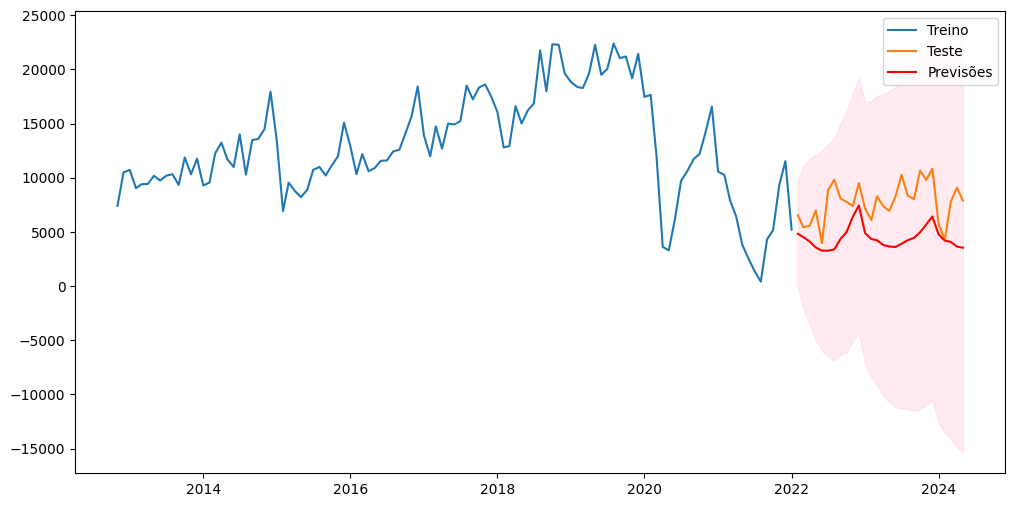

MAE: 3290.5212283066203
MSE: 13898164.233775575
RMSE: 3728.024172906551


In [ ]:
# Definir a proporção dos dados para teste (por exemplo, 20%)
proportion = 0.2
train_size = int(len(AnaliseAuto) * (1 - proportion))

# Dividir os dados
train = AnaliseAuto.iloc[:train_size]
test = AnaliseAuto.iloc[train_size:]

# Ajustar o modelo SARIMA no conjunto de treino
# Definir os parâmetros do modelo SARIMA (ajuste conforme necessário)

# Ajustar o modelo SARIMA no conjunto de treino
model = SARIMAX(train['Quantidade'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Fazer previsões com o modelo ajustado
predictions_simplified = model_fit.get_forecast(steps=len(test))
predicted_mean_simplified = predictions_simplified.predicted_mean
confidence_intervals_simplified = predictions_simplified.conf_int()

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Quantidade'], label='Treino')
plt.plot(test.index, test['Quantidade'], label='Teste')
plt.plot(test.index, predicted_mean_simplified, label='Previsões', color='red')
plt.fill_between(test.index, confidence_intervals_simplified.iloc[:, 0], confidence_intervals_simplified.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Calcular métricas de desempenho
mae_simplified = mean_absolute_error(test['Quantidade'], predicted_mean_simplified)
mse_simplified = mean_squared_error(test['Quantidade'], predicted_mean_simplified)
rmse_simplified = mse_simplified ** 0.5

print(f'MAE: {mae_simplified}')
print(f'MSE: {mse_simplified}')
print(f'RMSE: {rmse_simplified}')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 0, 1   # Parâmetros não sazonais

# Definir o modelo ARIMA
model = ARIMA(AnaliseAutoModelo['Quantidade'], order=(p, d, q))  # substitua p, d, q pelos valores apropriados

# Ajustar o modelo
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

# Fazer previsões
forecast = model_fit.forecast(steps=12);  # Prever os próximos 10 períodos
print(forecast)

                               SARIMAX Results                                
Dep. Variable:             Quantidade   No. Observations:                  139
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1274.844
Date:                Fri, 16 Aug 2024   AIC                           2559.687
Time:                        18:08:07   BIC                           2574.360
Sample:                             0   HQIC                          2565.650
                                - 139                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.182e+04   2165.555      5.457      0.000    7573.039    1.61e+04
ar.L1          1.6542      0.307      5.395      0.000       1.053       2.255
ar.L2         -0.6690      0.277     -2.418      0.0

c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


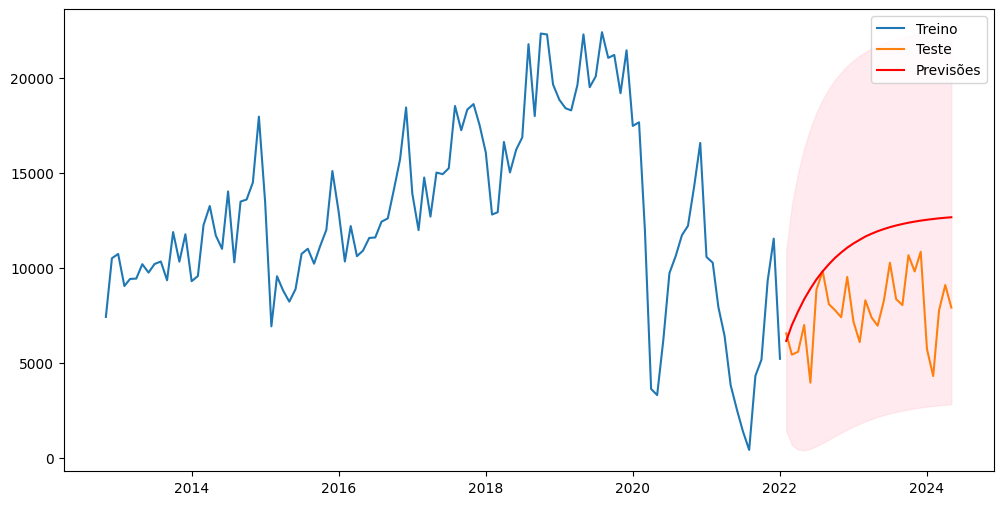

MAE: 3248.1688741580015
MSE: 14206485.192848518
RMSE: 3769.1491338030814


In [ ]:
# Definir a proporção dos dados para teste (por exemplo, 20%)
proportion = 0.2
train_size = int(len(AnaliseAuto) * (1 - proportion))

# Dividir os dados
train = AnaliseAuto.iloc[:train_size]
test = AnaliseAuto.iloc[train_size:]

# Ajustar o modelo SARIMA no conjunto de treino
# Definir os parâmetros do modelo SARIMA (ajuste conforme necessário)


# Definir o modelo ARIMA
model = ARIMA(train['Quantidade'], order=(p, d, q))  # substitua p, d, q pelos valores apropriados
model_fit = model.fit()

# Fazer previsões com o modelo ajustado
predictions_simplified = model_fit.get_forecast(steps=len(test))
predicted_mean_simplified = predictions_simplified.predicted_mean
confidence_intervals_simplified = predictions_simplified.conf_int()

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Quantidade'], label='Treino')
plt.plot(test.index, test['Quantidade'], label='Teste')
plt.plot(test.index, predicted_mean_simplified, label='Previsões', color='red')
plt.fill_between(test.index, confidence_intervals_simplified.iloc[:, 0], confidence_intervals_simplified.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Calcular métricas de desempenho
mae_simplified = mean_absolute_error(test['Quantidade'], predicted_mean_simplified)
mse_simplified = mean_squared_error(test['Quantidade'], predicted_mean_simplified)
rmse_simplified = mse_simplified ** 0.5

print(f'MAE: {mae_simplified}')
print(f'MSE: {mse_simplified}')
print(f'RMSE: {rmse_simplified}')

Como os valores possuem uma grande mudança (em 2020 e em 2021) é preciso substituir esses outliers por valores mais próximo média, mediana, moda, entre outros.

In [ ]:
from statistics import mode

In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

In [ ]:
print(f"Média ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').mean().Quantidade)
print(f"Mínimo ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').min().Quantidade)
print(f"Máximo ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').max().Quantidade)
print(f"Mediana ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').median().Quantidade)
print(f"Moda ", mode(AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').Quantidade))

Média  8708.416666666666
Mínimo  410
Máximo  17652
Mediana  9521.5
Moda  17463


In [ ]:
# Identificar o período de 2020-01-01 a 2021-12-01
periodo = (AnaliseAuto.index >= '2020-01-01') & (AnaliseAuto.index <= '2021-12-01')

# Identificar os valores menores que 4000 dentro do período
valores_menores_que_4000 = (AnaliseAuto['Quantidade'] <= 6000) & periodo

# Calcular a media do período especificado
media = AnaliseAuto.loc[periodo, 'Quantidade'].mean()

# Substituir esses valores por NaN
AnaliseAuto.loc[valores_menores_que_4000, 'Quantidade'] = np.nan

# Substituir os valores NaN pela media
AnaliseAuto['Quantidade'].fillna(media, inplace=True)


In [ ]:
print(media);

8708.416666666666


Como foi adicionado novos valores, é preciso reavaliar os parâmetros e suas previsões

ADF Statistic: -1.4374534673584807
p-value: 0.5641946591935104


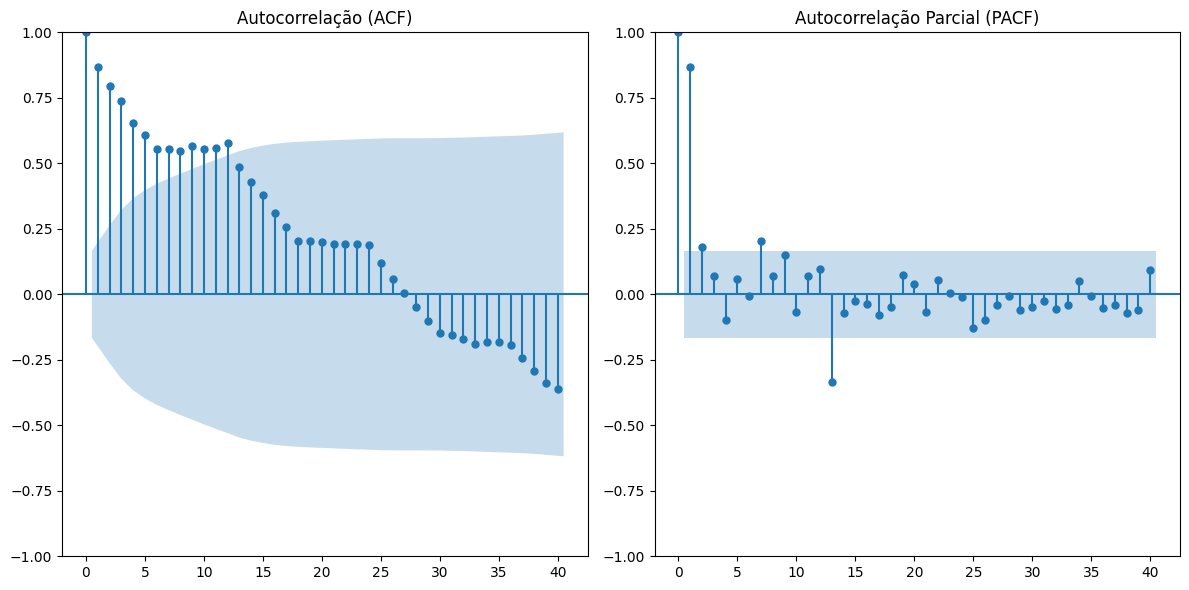

In [ ]:
# Teste de estacionaridade (ADF)
result = adfuller(AnaliseAuto['Quantidade'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF e PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(AnaliseAuto['Quantidade'], lags=40, ax=plt.gca())
plt.title('Autocorrelação (ACF)')

plt.subplot(122)
plot_pacf(AnaliseAuto['Quantidade'], lags=40, ax=plt.gca())
plt.title('Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 1, 1, 1   # Parâmetros não sazonais
P, D, Q, s = 2, 0, 2, 12  # Parâmetros sazonais

# Definir o modelo SARIMA
model = SARIMAX(AnaliseAuto['Quantidade'], order=(p, d, q), seasonal_order=(P, D, Q, s))  # substitua p, d, q, P, D, Q, s pelos valores apropriados

# Ajustar o modelo
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

# Fazer previsões
forecast = model_fit.forecast(steps=12);  # Prever os próximos 12 períodos
print(forecast)

c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                              Quantidade   No. Observations:                  139
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1243.973
Date:                                 Fri, 16 Aug 2024   AIC                           2501.947
Time:                                         18:08:13   BIC                           2522.437
Sample:                                     11-01-2012   HQIC                          2510.273
                                          - 05-01-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4559      0.336      1.356      0.175      -0.203       1

c:\Users\FG\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


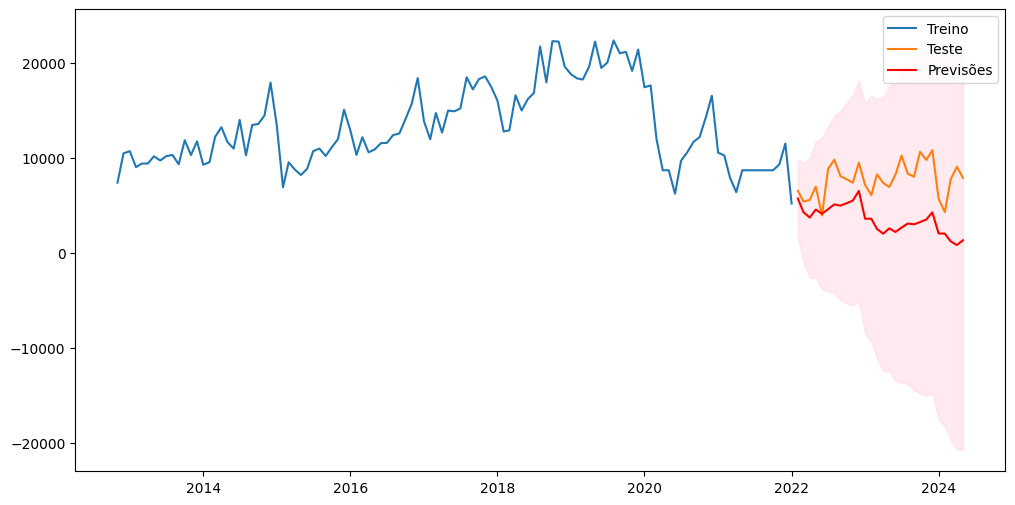

MAE: 4244.147350513592
MSE: 22751032.596031062
RMSE: 4769.8042513326545


In [ ]:
# Definir a proporção dos dados para teste (por exemplo, 20%)
proportion = 0.2
train_size = int(len(AnaliseAuto) * (1 - proportion))

# Dividir os dados
train = AnaliseAuto.iloc[:train_size]
test = AnaliseAuto.iloc[train_size:]

# Ajustar o modelo SARIMA no conjunto de treino
# Definir os parâmetros do modelo SARIMA (ajuste conforme necessário)
#p, d, q = 2, 1, 7   # Parâmetros não sazonais
#P, D, Q, s = 2, 0, 7, 12  # Parâmetros sazonais

# Ajustar o modelo SARIMA no conjunto de treino
model = SARIMAX(train['Quantidade'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Fazer previsões com o modelo ajustado
predictions_simplified = model_fit.get_forecast(steps=len(test))
predicted_mean_simplified = predictions_simplified.predicted_mean
confidence_intervals_simplified = predictions_simplified.conf_int()

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Quantidade'], label='Treino')
plt.plot(test.index, test['Quantidade'], label='Teste')
plt.plot(test.index, predicted_mean_simplified, label='Previsões', color='red')
plt.fill_between(test.index, confidence_intervals_simplified.iloc[:, 0], confidence_intervals_simplified.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Calcular métricas de desempenho
mae_simplified = mean_absolute_error(test['Quantidade'], predicted_mean_simplified)
mse_simplified = mean_squared_error(test['Quantidade'], predicted_mean_simplified)
rmse_simplified = mse_simplified ** 0.5

print(f'MAE: {mae_simplified}')
print(f'MSE: {mse_simplified}')
print(f'RMSE: {rmse_simplified}')


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 1   # Parâmetros não sazonais

# Definir o modelo ARIMA
model = ARIMA(AnaliseAuto['Quantidade'], order=(p, d, q))  # substitua p, d, q pelos valores apropriados

# Ajustar o modelo
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

# Fazer previsões
forecast = model_fit.forecast(steps=12);  # Prever os próximos 10 períodos
print(forecast)

                               SARIMAX Results                                
Dep. Variable:             Quantidade   No. Observations:                  139
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1256.228
Date:                Fri, 16 Aug 2024   AIC                           2520.455
Time:                        18:08:15   BIC                           2532.164
Sample:                    11-01-2012   HQIC                          2525.214
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9798      0.214     -4.573      0.000      -1.400      -0.560
ar.L2         -0.2443      0.076     -3.230      0.001      -0.393      -0.096
ma.L1          0.7977      0.225      3.538      0.0

Interpretação dos Coeficientes<br>
Parâmetros AR (Auto-Regressive):<br>

ar.L1: coeficiente AR no lag 1. Valor significativo (-1.2073, p=0.000), indicando forte relação negativa.<br>
ar.L2: coeficiente AR no lag 2. Valor significativo (-0.5585, p=0.006).<br>
Parâmetros MA (Moving Average):<br>

ma.L1: coeficiente MA no lag 1. Valor significativo (1.0562, p=0.000).<br>
ma.L2: coeficiente MA no lag 2. Não significativo (0.2024, p=0.276).<br>
ma.L3: coeficiente MA no lag 3. Significativo (-0.4018, p=0.007).<br>
ma.L4: coeficiente MA no lag 4. Marginalmente significativo (-0.3250, p=0.049).<br>
ma.L5 a ma.L9: coeficientes MA que não são significativos (p-valores > 0.05).<br>
ma.L10: coeficiente MA no lag 10. Significativo (0.2746, p=0.030).<br>
Sigma2 (Variância do Erro):<br>

sigma2: variância do erro do modelo. O valor é 4.886e+06, indicando a magnitude da variabilidade dos resíduos.<br>
Conclusões<br>
O modelo ARIMA(2, 1, 10) apresenta alguns coeficientes AR e MA significativos, indicando que esses termos são importantes para capturar a estrutura da série temporal.<br>
Vários coeficientes MA não são significativos, sugerindo que a inclusão de 10 termos MA pode ser excessiva. A complexidade do modelo pode ser reduzida.<br>
A análise dos critérios de informação (AIC, BIC, HQIC) e a inspeção dos resíduos do modelo são necessárias para confirmar a adequação do modelo e identificar possíveis melhorias.<br>

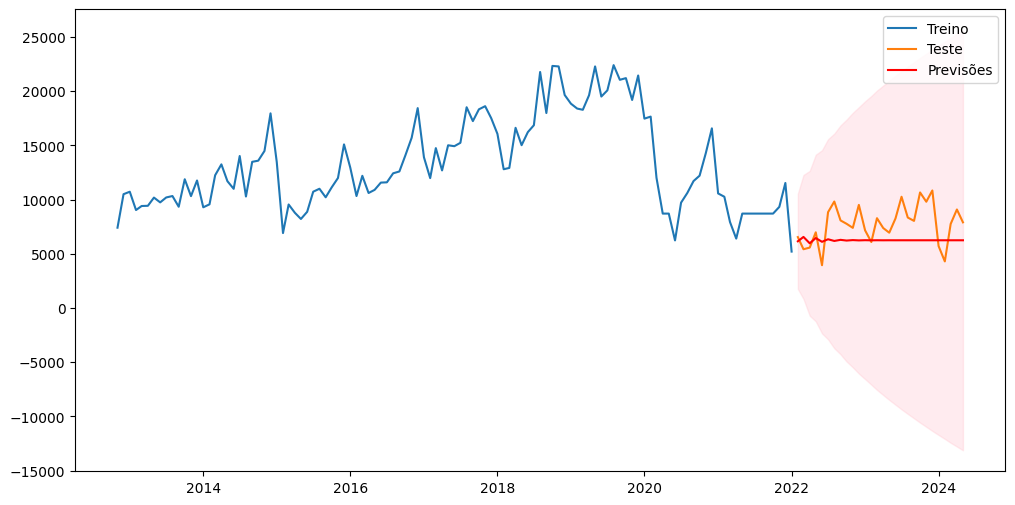

MAE: 1940.9593331237782
MSE: 5298429.48210293
RMSE: 2301.831766681251


In [ ]:
# Definir a proporção dos dados para teste (por exemplo, 20%)
proportion = 0.2
train_size = int(len(AnaliseAuto) * (1 - proportion))

# Dividir os dados
train = AnaliseAuto.iloc[:train_size]
test = AnaliseAuto.iloc[train_size:]

# Ajustar o modelo SARIMA no conjunto de treino
# Definir os parâmetros do modelo SARIMA (ajuste conforme necessário)

# Definir o modelo ARIMA
model = ARIMA(train['Quantidade'], order=(p, d, q))  # substitua p, d, q pelos valores apropriados
model_fit = model.fit()

# Fazer previsões com o modelo ajustado
predictions_simplified = model_fit.get_forecast(steps=len(test))
predicted_mean_simplified = predictions_simplified.predicted_mean
confidence_intervals_simplified = predictions_simplified.conf_int()

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Quantidade'], label='Treino')
plt.plot(test.index, test['Quantidade'], label='Teste')
plt.plot(test.index, predicted_mean_simplified, label='Previsões', color='red')
plt.fill_between(test.index, confidence_intervals_simplified.iloc[:, 0], confidence_intervals_simplified.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Calcular métricas de desempenho
mae_simplified = mean_absolute_error(test['Quantidade'], predicted_mean_simplified)
mse_simplified = mean_squared_error(test['Quantidade'], predicted_mean_simplified)
rmse_simplified = mse_simplified ** 0.5

print(f'MAE: {mae_simplified}')
print(f'MSE: {mse_simplified}')
print(f'RMSE: {rmse_simplified}')

Realizar a diferenciação no dataframe para ver se temos menos MAE e consecutivamente, os outros dois valores estátisticos MSE e RMSE.

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\FG\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

In [ ]:
# Resetar o índice do DataFrame
AnaliseAuto.reset_index(inplace=True)

In [ ]:
AnaliseAuto.dtypes

Data          datetime64[ns]
Quantidade             int64
dtype: object

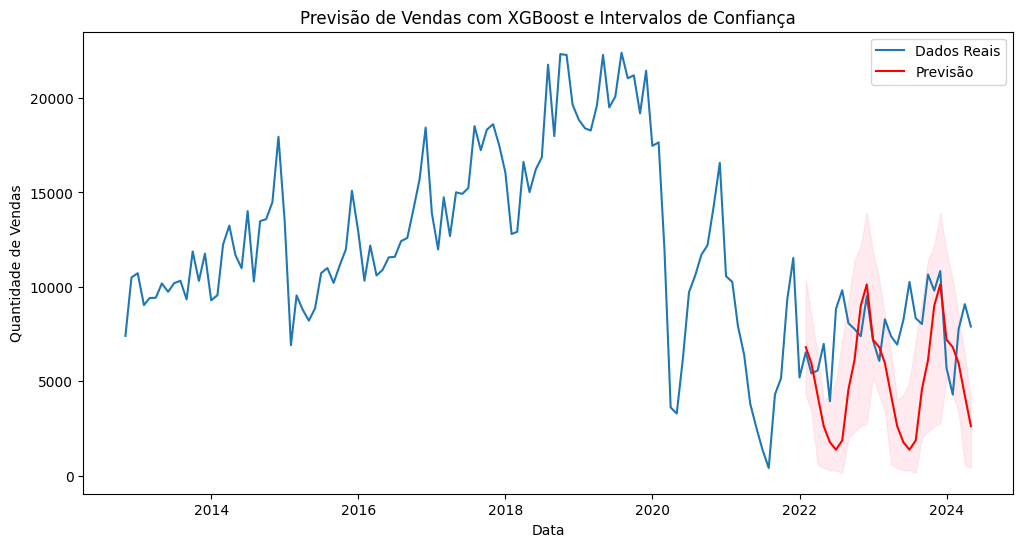

MAE: 3187.488988372257
MSE: 16301896.920042315
RMSE: 4037.5607636346867


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Converta a coluna 'Data' para datetime
AnaliseAuto['Data'] = pd.to_datetime(AnaliseAuto['Data'])

# Ordene o DataFrame por data
AnaliseAuto.sort_values(by='Data', inplace=True)

# Extraia características temporais da coluna 'Data'
AnaliseAuto['Ano'] = AnaliseAuto['Data'].dt.year
AnaliseAuto['Mes'] = AnaliseAuto['Data'].dt.month
AnaliseAuto['Dia'] = AnaliseAuto['Data'].dt.day

# Divida os dados em features (X) e target (y)
X = AnaliseAuto.drop(columns=['Quantidade', 'Data'])
y = AnaliseAuto['Quantidade']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Número de amostras de bootstrap
n_bootstraps = 100

# Matriz para armazenar as previsões de cada bootstrap
bootstrap_preds = np.zeros((n_bootstraps, len(X_test)))

# Executar bootstrap
for i in range(n_bootstraps):
    # Amostrar com substituição
    X_resample, y_resample = resample(X_train, y_train, random_state=i)
    
    # Treinar o modelo
    model = XGBRegressor(**params)
    model.fit(X_resample, y_resample)
    
    # Fazer previsões no conjunto de teste
    y_pred_test = model.predict(X_test)
    
    # Armazenar as previsões
    bootstrap_preds[i, :] = y_pred_test

# Calcular a média das previsões
pred_mean = np.mean(bootstrap_preds, axis=0)

# Calcular os intervalos de confiança (por exemplo, 95%)
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Adicionar as previsões ao DataFrame original para visualização
AnaliseAuto['Previsão'] = np.nan
AnaliseAuto.loc[X_test.index, 'Previsão'] = pred_mean

# Plotar as previsões com intervalos de confiança
plt.figure(figsize=(12, 6))
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Quantidade'], label='Dados Reais')
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Previsão'], label='Previsão', color='red')
plt.fill_between(AnaliseAuto['Data'].iloc[X_test.index], ci_lower, ci_upper, color='pink', alpha=0.3)
plt.legend()
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Previsão de Vendas com XGBoost e Intervalos de Confiança')
plt.show()

# Calcular métricas de desempenho
mae = mean_absolute_error(y_test, pred_mean)
mse = mean_squared_error(y_test, pred_mean)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

In [ ]:
print(f"Média ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').mean().Quantidade)
print(f"Mínimo ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').min().Quantidade)
print(f"Máximo ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').max().Quantidade)
print(f"Mediana ", AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').median().Quantidade)
print(f"Moda ", mode(AnaliseAuto.query('Data >= "2020-01-01" and Data <= "2021-12-01"').Quantidade))

Média  8708.416666666666
Mínimo  410
Máximo  17652
Mediana  9521.5
Moda  17463


In [ ]:
# Identificar o período de 2020-01-01 a 2021-12-01
periodo = (AnaliseAuto.index >= '2020-01-01') & (AnaliseAuto.index <= '2021-12-01')

# Identificar os valores menores que 4000 dentro do período
valores_menores_que_4000 = (AnaliseAuto['Quantidade'] <= 6000) & periodo

# Calcular a media do período especificado
media = AnaliseAuto.loc[periodo, 'Quantidade'].mean()

# Substituir esses valores por NaN
AnaliseAuto.loc[valores_menores_que_4000, 'Quantidade'] = np.nan

# Substituir os valores NaN pela media
AnaliseAuto['Quantidade'].fillna(media, inplace=True)

In [ ]:
# Resetar o índice do DataFrame
AnaliseAuto.reset_index(inplace=True)

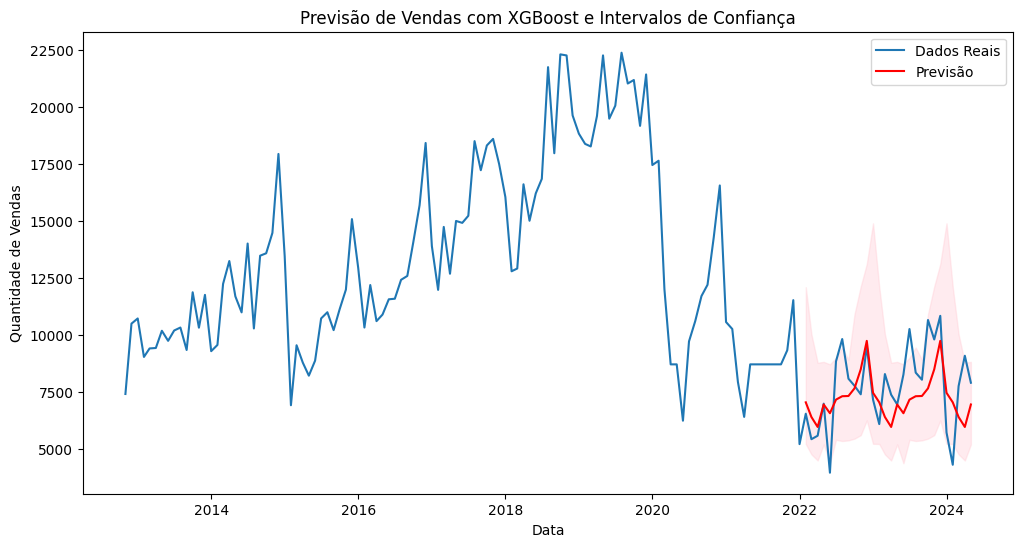

MAE: 1333.8235841587614
MSE: 2673402.1626333892
RMSE: 1635.0541772777406


In [ ]:
from sklearn.utils import resample

# Converta a coluna 'Data' para datetime
AnaliseAuto['Data'] = pd.to_datetime(AnaliseAuto['Data'])

# Ordene o DataFrame por data
AnaliseAuto.sort_values(by='Data', inplace=True)

# Extraia características temporais da coluna 'Data'
AnaliseAuto['Ano'] = AnaliseAuto['Data'].dt.year
AnaliseAuto['Mes'] = AnaliseAuto['Data'].dt.month
AnaliseAuto['Dia'] = AnaliseAuto['Data'].dt.day

# Divida os dados em features (X) e target (y)
X = AnaliseAuto.drop(columns=['Quantidade', 'Data'])
y = AnaliseAuto['Quantidade']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Número de amostras de bootstrap
n_bootstraps = 100

# Matriz para armazenar as previsões de cada bootstrap
bootstrap_preds = np.zeros((n_bootstraps, len(X_test)))

# Executar bootstrap
for i in range(n_bootstraps):
    # Amostrar com substituição
    X_resample, y_resample = resample(X_train, y_train, random_state=i)
    
    # Treinar o modelo
    model = XGBRegressor(**params)
    model.fit(X_resample, y_resample)
    
    # Fazer previsões no conjunto de teste
    y_pred_test = model.predict(X_test)
    
    # Armazenar as previsões
    bootstrap_preds[i, :] = y_pred_test

# Calcular a média das previsões
pred_mean = np.mean(bootstrap_preds, axis=0)

# Calcular os intervalos de confiança (por exemplo, 95%)
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Adicionar as previsões ao DataFrame original para visualização
AnaliseAuto['Previsão'] = np.nan
AnaliseAuto.loc[X_test.index, 'Previsão'] = pred_mean

# Plotar as previsões com intervalos de confiança
plt.figure(figsize=(12, 6))
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Quantidade'], label='Dados Reais')
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Previsão'], label='Previsão', color='red')
plt.fill_between(AnaliseAuto['Data'].iloc[X_test.index], ci_lower, ci_upper, color='pink', alpha=0.3)
plt.legend()
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Previsão de Vendas com XGBoost e Intervalos de Confiança')
plt.show()

# Calcular métricas de desempenho
mae = mean_absolute_error(y_test, pred_mean)
mse = mean_squared_error(y_test, pred_mean)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

# Identificar o período de 2020-01-01 a 2021-12-01
periodo = (AnaliseAuto.index >= '2020-01-01') & (AnaliseAuto.index <= '2021-12-01')

# Identificar os valores menores que 4000 dentro do período
valores_menores_que_4000 = (AnaliseAuto['Quantidade'] <= 6000) & periodo

# Calcular a media do período especificado
media = AnaliseAuto.loc[periodo, 'Quantidade'].median()

# Substituir esses valores por NaN
AnaliseAuto.loc[valores_menores_que_4000, 'Quantidade'] = np.nan

# Substituir os valores NaN pela media
AnaliseAuto['Quantidade'].fillna(media, inplace=True)

# Resetar o índice do DataFrame
AnaliseAuto.reset_index(inplace=True)

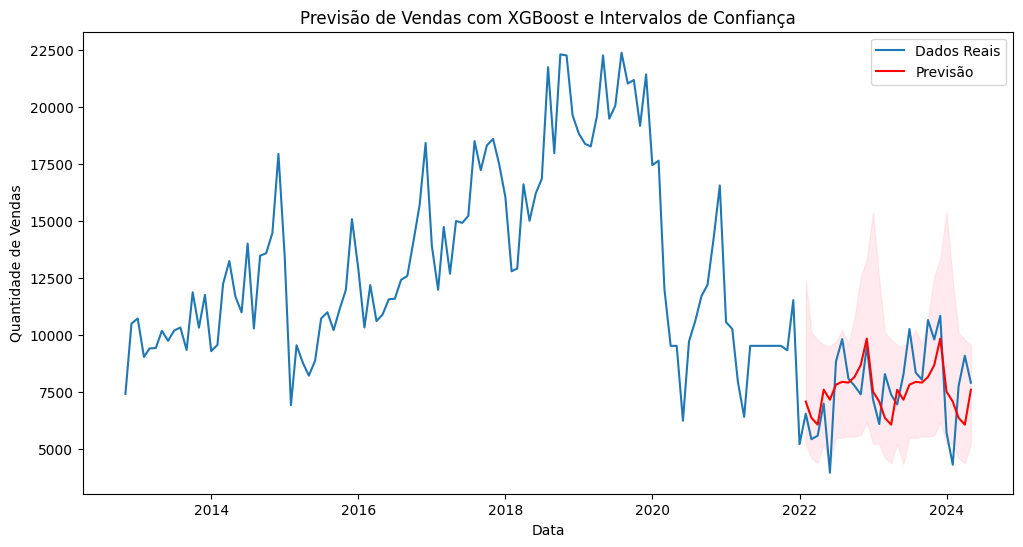

MAE: 1216.9283635602678
MSE: 2268848.4488573805
RMSE: 1506.2697131846542


In [ ]:
from sklearn.utils import resample

# Converta a coluna 'Data' para datetime
AnaliseAuto['Data'] = pd.to_datetime(AnaliseAuto['Data'])

# Ordene o DataFrame por data
AnaliseAuto.sort_values(by='Data', inplace=True)

# Extraia características temporais da coluna 'Data'
AnaliseAuto['Ano'] = AnaliseAuto['Data'].dt.year
AnaliseAuto['Mes'] = AnaliseAuto['Data'].dt.month
AnaliseAuto['Dia'] = AnaliseAuto['Data'].dt.day

# Divida os dados em features (X) e target (y)
X = AnaliseAuto.drop(columns=['Quantidade', 'Data'])
y = AnaliseAuto['Quantidade']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Número de amostras de bootstrap
n_bootstraps = 100

# Matriz para armazenar as previsões de cada bootstrap
bootstrap_preds = np.zeros((n_bootstraps, len(X_test)))

# Executar bootstrap
for i in range(n_bootstraps):
    # Amostrar com substituição
    X_resample, y_resample = resample(X_train, y_train, random_state=i)
    
    # Treinar o modelo
    model = XGBRegressor(**params)
    model.fit(X_resample, y_resample)
    
    # Fazer previsões no conjunto de teste
    y_pred_test = model.predict(X_test)
    
    # Armazenar as previsões
    bootstrap_preds[i, :] = y_pred_test

# Calcular a média das previsões
pred_mean = np.mean(bootstrap_preds, axis=0)

# Calcular os intervalos de confiança (por exemplo, 95%)
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Adicionar as previsões ao DataFrame original para visualização
AnaliseAuto['Previsão'] = np.nan
AnaliseAuto.loc[X_test.index, 'Previsão'] = pred_mean

# Plotar as previsões com intervalos de confiança
plt.figure(figsize=(12, 6))
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Quantidade'], label='Dados Reais')
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Previsão'], label='Previsão', color='red')
plt.fill_between(AnaliseAuto['Data'].iloc[X_test.index], ci_lower, ci_upper, color='pink', alpha=0.3)
plt.legend()
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Previsão de Vendas com XGBoost e Intervalos de Confiança')
plt.show()

# Calcular métricas de desempenho
mae = mean_absolute_error(y_test, pred_mean)
mse = mean_squared_error(y_test, pred_mean)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

# Identificar o período de 2020-01-01 a 2021-12-01
periodo = (AnaliseAuto.index >= '2020-01-01') & (AnaliseAuto.index <= '2021-12-01')

# Identificar os valores menores que 4000 dentro do período
valores_menores_que_4000 = (AnaliseAuto['Quantidade'] <= 6500) & periodo

# Calcular a media do período especificado
media = AnaliseAuto.loc[periodo, 'Quantidade'].mean()

# Substituir esses valores por NaN
AnaliseAuto.loc[valores_menores_que_4000, 'Quantidade'] = np.nan

# Substituir os valores NaN pela media
AnaliseAuto['Quantidade'].fillna(media, inplace=True)

# Resetar o índice do DataFrame
AnaliseAuto.reset_index(inplace=True)

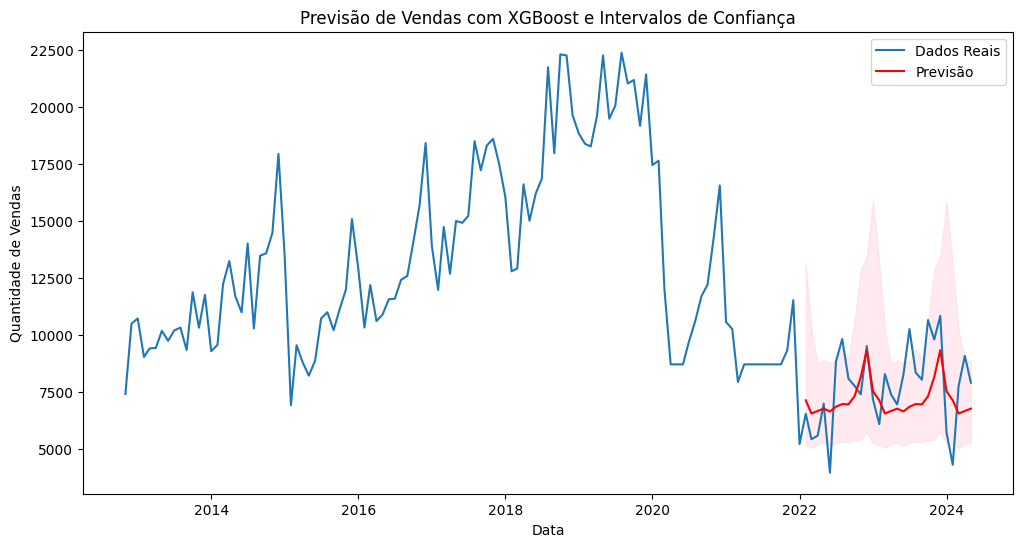

MAE: 1448.1040506417412
MSE: 2949583.9110184438
RMSE: 1717.435271274712


In [ ]:
from sklearn.utils import resample

# Converta a coluna 'Data' para datetime
AnaliseAuto['Data'] = pd.to_datetime(AnaliseAuto['Data'])

# Ordene o DataFrame por data
AnaliseAuto.sort_values(by='Data', inplace=True)

# Extraia características temporais da coluna 'Data'
AnaliseAuto['Ano'] = AnaliseAuto['Data'].dt.year
AnaliseAuto['Mes'] = AnaliseAuto['Data'].dt.month
AnaliseAuto['Dia'] = AnaliseAuto['Data'].dt.day

# Divida os dados em features (X) e target (y)
X = AnaliseAuto.drop(columns=['Quantidade', 'Data'])
y = AnaliseAuto['Quantidade']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Número de amostras de bootstrap
n_bootstraps = 100

# Matriz para armazenar as previsões de cada bootstrap
bootstrap_preds = np.zeros((n_bootstraps, len(X_test)))

# Executar bootstrap
for i in range(n_bootstraps):
    # Amostrar com substituição
    X_resample, y_resample = resample(X_train, y_train, random_state=i)
    
    # Treinar o modelo
    model = XGBRegressor(**params)
    model.fit(X_resample, y_resample)
    
    # Fazer previsões no conjunto de teste
    y_pred_test = model.predict(X_test)
    
    # Armazenar as previsões
    bootstrap_preds[i, :] = y_pred_test

# Calcular a média das previsões
pred_mean = np.mean(bootstrap_preds, axis=0)

# Calcular os intervalos de confiança (por exemplo, 95%)
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Adicionar as previsões ao DataFrame original para visualização
AnaliseAuto['Previsão'] = np.nan
AnaliseAuto.loc[X_test.index, 'Previsão'] = pred_mean

# Plotar as previsões com intervalos de confiança
plt.figure(figsize=(12, 6))
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Quantidade'], label='Dados Reais')
plt.plot(AnaliseAuto['Data'], AnaliseAuto['Previsão'], label='Previsão', color='red')
plt.fill_between(AnaliseAuto['Data'].iloc[X_test.index], ci_lower, ci_upper, color='pink', alpha=0.3)
plt.legend()
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Previsão de Vendas com XGBoost e Intervalos de Confiança')
plt.show()

# Calcular métricas de desempenho
mae = mean_absolute_error(y_test, pred_mean)
mse = mean_squared_error(y_test, pred_mean)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Para todos os modelos avaliados, o que apresentou melhor performance foi o de  XGBoost Regressor usando a mediana com a substituição de valores abaixo de 6000 unidades.

In [ ]:
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice (ajuste 'M' para 'D', 'W', 'Q', etc. conforme necessário)
AnaliseAuto = AnaliseAuto.asfreq('MS')

# Identificar o período de 2020-01-01 a 2021-12-01
periodo = (AnaliseAuto.index >= '2020-01-01') & (AnaliseAuto.index <= '2021-12-01')

# Identificar os valores menores que 6000 dentro do período
valores_menores_que_6000 = (AnaliseAuto['Quantidade'] <= 6000) & periodo

# Calcular a media do período especificado
media = AnaliseAuto.loc[periodo, 'Quantidade'].median()

# Substituir esses valores por NaN
AnaliseAuto.loc[valores_menores_que_6000, 'Quantidade'] = np.nan

# Substituir os valores NaN pela media
AnaliseAuto['Quantidade'].fillna(media, inplace=True)

# Resetar o índice do DataFrame
AnaliseAuto.reset_index(inplace=True)

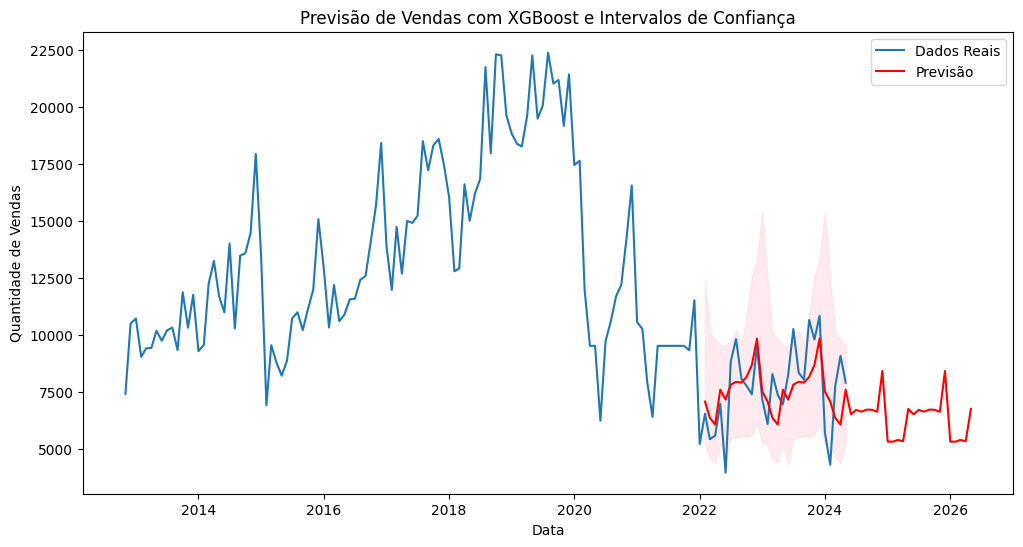

MAE: 1217.0
MSE: 2268848.4488573805
RMSE: 1506.2697131846542


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Supondo que AnaliseAuto seja o DataFrame contendo os dados de vendas

# Converta a coluna 'Data' para datetime
AnaliseAuto['Data'] = pd.to_datetime(AnaliseAuto['Data'])

# Ordene o DataFrame por data
AnaliseAuto.sort_values(by='Data', inplace=True)

# Extraia características temporais da coluna 'Data'
AnaliseAuto['Ano'] = AnaliseAuto['Data'].dt.year
AnaliseAuto['Mes'] = AnaliseAuto['Data'].dt.month
AnaliseAuto['Dia'] = AnaliseAuto['Data'].dt.day

# Divida os dados em features (X) e target (y)
X = AnaliseAuto.drop(columns=['Quantidade', 'Data'])
y = AnaliseAuto['Quantidade']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Número de amostras de bootstrap
n_bootstraps = 100

# Matriz para armazenar as previsões de cada bootstrap
bootstrap_preds = np.zeros((n_bootstraps, len(X_test)))

# Executar bootstrap
for i in range(n_bootstraps):
    # Amostrar com substituição
    X_resample, y_resample = resample(X_train, y_train, random_state=i)
    
    # Treinar o modelo
    model = XGBRegressor(**params)
    model.fit(X_resample, y_resample)
    
    # Fazer previsões no conjunto de teste
    y_pred_test = model.predict(X_test)
    
    # Armazenar as previsões
    bootstrap_preds[i, :] = y_pred_test

# Calcular a média das previsões
pred_mean = np.mean(bootstrap_preds, axis=0)

# Calcular os intervalos de confiança (por exemplo, 95%)
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Adicionar as previsões ao DataFrame original para visualização
AnaliseAuto['Previsão'] = np.nan
AnaliseAuto.loc[X_test.index, 'Previsão'] = np.round(pred_mean, 0)

# Criar novas datas para os próximos 12 meses
last_date = AnaliseAuto['Data'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=24, freq='MS')

# Criar DataFrame para os próximos 12 meses
future_df = pd.DataFrame({'Data': future_dates})
future_df['Ano'] = future_df['Data'].dt.year
future_df['Mes'] = future_df['Data'].dt.month
future_df['Dia'] = future_df['Data'].dt.day

# Prever os próximos 24 meses
future_X = future_df.drop(columns=['Data'])
future_preds = model.predict(future_X)

# Arredondar as previsões futuras
future_df['Previsão'] = np.round(future_preds, 0)
future_df['Quantidade'] = np.nan  # Colocamos NaN para manter a estrutura

# Concatenar os DataFrames para visualizar todas as previsões
result_df = pd.concat([AnaliseAuto, future_df], ignore_index=True)

# Plotar as previsões com intervalos de confiança, incluindo os próximos 12 meses
plt.figure(figsize=(12, 6))
plt.plot(result_df['Data'], result_df['Quantidade'], label='Dados Reais')
plt.plot(result_df['Data'], result_df['Previsão'], label='Previsão', color='red')
plt.fill_between(AnaliseAuto['Data'].iloc[X_test.index], ci_lower, ci_upper, color='pink', alpha=0.3)
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Previsão de Vendas com XGBoost e Intervalos de Confiança')
plt.legend()
plt.show()

# Calcular métricas de desempenho para o período testado
mae = mean_absolute_error(y_test, pred_mean)
mse = mean_squared_error(y_test, pred_mean)
rmse = np.sqrt(mse)

print(f'MAE: {round(mae, 0)}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

In [ ]:
# Supondo que AnaliseAutoModelo seja o DataFrame original
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice como mensal
AnaliseAuto = AnaliseAuto.asfreq('MS')

# Identificar o período de 2010-01-01 a 2019-12-01
periodo_referencia = (AnaliseAuto.index >= '2022-01-01') & (AnaliseAuto.index <= '2024-05-01')

# Calcular a mediana para cada mês de janeiro de 2010 a dezembro de 2019
medianas_por_mes = AnaliseAuto.loc[periodo_referencia].groupby(AnaliseAuto.loc[periodo_referencia].index.month)['Quantidade'].median()

# Identificar o período de 2020-01-01 a 2021-12-01
periodo_substituicao = (AnaliseAuto.index >= '2020-01-01') & (AnaliseAuto.index <= '2021-12-01')

# Substituir os valores de janeiro de 2020 a dezembro de 2021 pela mediana correspondente
for mes in range(1, 13):
    mask = (AnaliseAuto.index.month == mes) & periodo_substituicao
    AnaliseAuto.loc[mask, 'Quantidade'] = medianas_por_mes[mes]

# Resetar o índice do DataFrame
AnaliseAuto.reset_index(inplace=True)

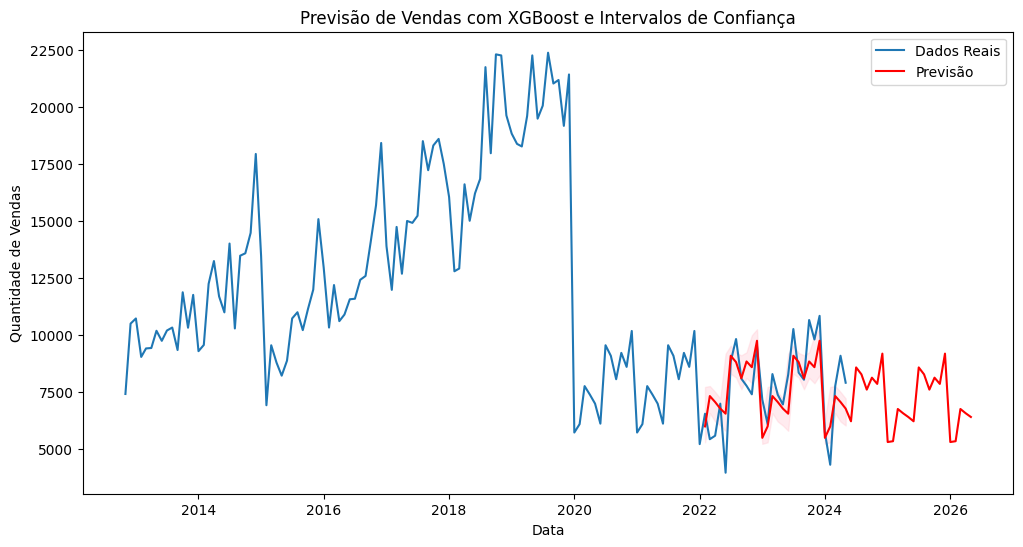

MAE: 959.0
MSE: 1411667.4609143506
RMSE: 1188.1361289491833


In [ ]:
# Converta a coluna 'Data' para datetime
AnaliseAuto['Data'] = pd.to_datetime(AnaliseAuto['Data'])

# Ordene o DataFrame por data
AnaliseAuto.sort_values(by='Data', inplace=True)

# Extraia características temporais da coluna 'Data'
AnaliseAuto['Ano'] = AnaliseAuto['Data'].dt.year
AnaliseAuto['Mes'] = AnaliseAuto['Data'].dt.month
AnaliseAuto['Dia'] = AnaliseAuto['Data'].dt.day

# Divida os dados em features (X) e target (y)
X = AnaliseAuto.drop(columns=['Quantidade', 'Data'])
y = AnaliseAuto['Quantidade']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Número de amostras de bootstrap
n_bootstraps = 100

# Matriz para armazenar as previsões de cada bootstrap
bootstrap_preds = np.zeros((n_bootstraps, len(X_test)))

# Executar bootstrap
for i in range(n_bootstraps):
    # Amostrar com substituição
    X_resample, y_resample = resample(X_train, y_train, random_state=i)
    
    # Treinar o modelo
    model = XGBRegressor(**params)
    model.fit(X_resample, y_resample)
    
    # Fazer previsões no conjunto de teste
    y_pred_test = model.predict(X_test)
    
    # Armazenar as previsões
    bootstrap_preds[i, :] = y_pred_test

# Calcular a média das previsões
pred_mean = np.mean(bootstrap_preds, axis=0)

# Calcular os intervalos de confiança (por exemplo, 95%)
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Adicionar as previsões ao DataFrame original para visualização
AnaliseAuto['Previsão'] = np.nan
AnaliseAuto.loc[X_test.index, 'Previsão'] = np.round(pred_mean, 0)

# Criar novas datas para os próximos 12 meses
last_date = AnaliseAuto['Data'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=24, freq='MS')

# Criar DataFrame para os próximos 12 meses
future_df = pd.DataFrame({'Data': future_dates})
future_df['Ano'] = future_df['Data'].dt.year
future_df['Mes'] = future_df['Data'].dt.month
future_df['Dia'] = future_df['Data'].dt.day

# Prever os próximos 24 meses
future_X = future_df.drop(columns=['Data'])
future_preds = model.predict(future_X)

# Arredondar as previsões futuras
future_df['Previsão'] = np.round(future_preds, 0)
future_df['Quantidade'] = np.nan  # Colocamos NaN para manter a estrutura

# Concatenar os DataFrames para visualizar todas as previsões
result_df = pd.concat([AnaliseAuto, future_df], ignore_index=True)

# Plotar as previsões com intervalos de confiança, incluindo os próximos 12 meses
plt.figure(figsize=(12, 6))
plt.plot(result_df['Data'], result_df['Quantidade'], label='Dados Reais')
plt.plot(result_df['Data'], result_df['Previsão'], label='Previsão', color='red')
plt.fill_between(AnaliseAuto['Data'].iloc[X_test.index], ci_lower, ci_upper, color='pink', alpha=0.3)
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Previsão de Vendas com XGBoost e Intervalos de Confiança')
plt.legend()
plt.show()

# Calcular métricas de desempenho para o período testado
mae = mean_absolute_error(y_test, pred_mean)
mse = mean_squared_error(y_test, pred_mean)
rmse = np.sqrt(mse)

print(f'MAE: {round(mae, 0)}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

In [ ]:
# Selecionar as últimas 24 linhas do DataFrame result_df
tabela_resultado = result_df.tail(24)[['Data', 'Previsão']]

# Converter a tabela para HTML formatado
tabela_html = tabela_resultado.to_html(index=False, classes='table table-striped', border=0)

# Exibir a tabela formatada
from IPython.display import display, HTML
display(HTML(tabela_html))

In [ ]:
# Supondo que AnaliseAutoModelo seja o DataFrame original
AnaliseAuto = AnaliseAutoModelo.set_index('Data')

# Converta o índice para o tipo DatetimeIndex
AnaliseAuto.index = pd.to_datetime(AnaliseAuto.index)

# Defina a frequência do índice como mensal
AnaliseAuto = AnaliseAuto.asfreq('MS')

# Identificar o período de 2010-01-01 a 2019-12-01
periodo_referencia = (AnaliseAuto.index >= '2022-01-01') & (AnaliseAuto.index <= '2024-05-01')

# Calcular a mediana para cada mês de janeiro de 2010 a dezembro de 2019
medianas_por_mes = AnaliseAuto.loc[periodo_referencia].groupby(AnaliseAuto.loc[periodo_referencia].index.month)['Quantidade'].mean()

# Identificar o período de 2020-01-01 a 2021-12-01
periodo_substituicao = (AnaliseAuto.index >= '2020-01-01') & (AnaliseAuto.index <= '2021-12-01')

# Substituir os valores de janeiro de 2020 a dezembro de 2021 pela mediana correspondente
for mes in range(1, 13):
    mask = (AnaliseAuto.index.month == mes) & periodo_substituicao
    AnaliseAuto.loc[mask, 'Quantidade'] = medianas_por_mes[mes]

# Resetar o índice do DataFrame
AnaliseAuto.reset_index(inplace=True)

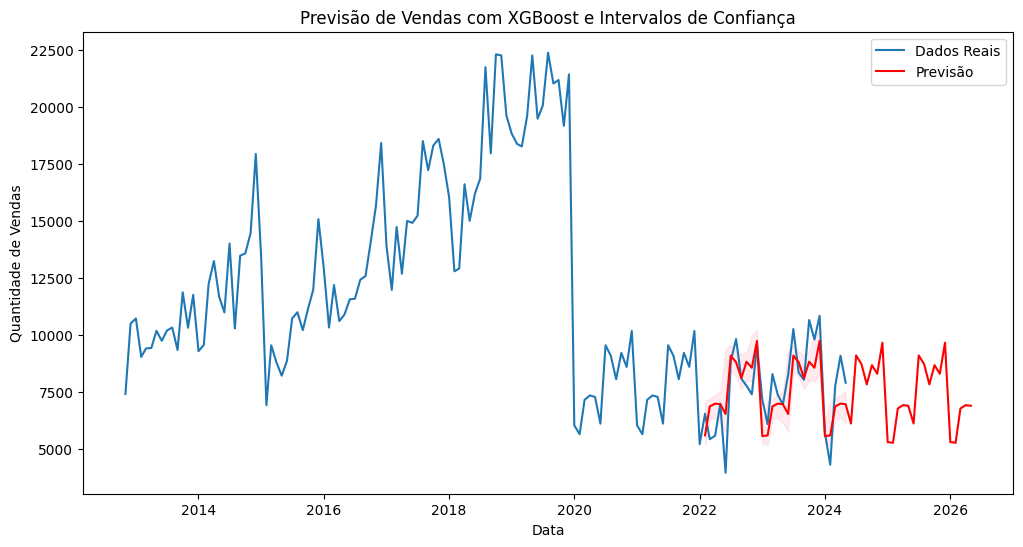

MAE: 967.0
MSE: 1383830.0022543347
RMSE: 1176.3630401599391


In [ ]:
# Converta a coluna 'Data' para datetime
AnaliseAuto['Data'] = pd.to_datetime(AnaliseAuto['Data'])

# Ordene o DataFrame por data
AnaliseAuto.sort_values(by='Data', inplace=True)

# Extraia características temporais da coluna 'Data'
AnaliseAuto['Ano'] = AnaliseAuto['Data'].dt.year
AnaliseAuto['Mes'] = AnaliseAuto['Data'].dt.month
AnaliseAuto['Dia'] = AnaliseAuto['Data'].dt.day

# Divida os dados em features (X) e target (y)
X = AnaliseAuto.drop(columns=['Quantidade', 'Data'])
y = AnaliseAuto['Quantidade']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Número de amostras de bootstrap
n_bootstraps = 100

# Matriz para armazenar as previsões de cada bootstrap
bootstrap_preds = np.zeros((n_bootstraps, len(X_test)))

# Executar bootstrap
for i in range(n_bootstraps):
    # Amostrar com substituição
    X_resample, y_resample = resample(X_train, y_train, random_state=i)
    
    # Treinar o modelo
    model = XGBRegressor(**params)
    model.fit(X_resample, y_resample)
    
    # Fazer previsões no conjunto de teste
    y_pred_test = model.predict(X_test)
    
    # Armazenar as previsões
    bootstrap_preds[i, :] = y_pred_test

# Calcular a média das previsões
pred_mean = np.mean(bootstrap_preds, axis=0)

# Calcular os intervalos de confiança (por exemplo, 95%)
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Adicionar as previsões ao DataFrame original para visualização
AnaliseAuto['Previsão'] = np.nan
AnaliseAuto.loc[X_test.index, 'Previsão'] = np.round(pred_mean, 0)

# Criar novas datas para os próximos 12 meses
last_date = AnaliseAuto['Data'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=24, freq='MS')

# Criar DataFrame para os próximos 12 meses
future_df = pd.DataFrame({'Data': future_dates})
future_df['Ano'] = future_df['Data'].dt.year
future_df['Mes'] = future_df['Data'].dt.month
future_df['Dia'] = future_df['Data'].dt.day

# Prever os próximos 24 meses
future_X = future_df.drop(columns=['Data'])
future_preds = model.predict(future_X)

# Arredondar as previsões futuras
future_df['Previsão'] = np.round(future_preds, 0)
future_df['Quantidade'] = np.nan  # Colocamos NaN para manter a estrutura

# Concatenar os DataFrames para visualizar todas as previsões
result_df = pd.concat([AnaliseAuto, future_df], ignore_index=True)

# Plotar as previsões com intervalos de confiança, incluindo os próximos 12 meses
plt.figure(figsize=(12, 6))
plt.plot(result_df['Data'], result_df['Quantidade'], label='Dados Reais')
plt.plot(result_df['Data'], result_df['Previsão'], label='Previsão', color='red')
plt.fill_between(AnaliseAuto['Data'].iloc[X_test.index], ci_lower, ci_upper, color='pink', alpha=0.3)
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Previsão de Vendas com XGBoost e Intervalos de Confiança')
plt.legend()
plt.show()

# Calcular métricas de desempenho para o período testado
mae = mean_absolute_error(y_test, pred_mean)
mse = mean_squared_error(y_test, pred_mean)
rmse = np.sqrt(mse)

print(f'MAE: {round(mae, 0)}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')